## Evaluation Project 5 Temperature Forecast Project using ML
##### By: Sadaf Shamim

##### Batch: DS2307

### Problem Statement:
##### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017

#### Attribute Information:
(Local Data Assimilation and Prediction System - (LDAPS) Model)

For more information, read [Cho et al, 2020].

- 1 station - used weather station number: 1 to 25
- 2 Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- 3 Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- 4 Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- 5 LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- 6 LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- 7 LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- 8 LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- 9 LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- 10 LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- 11 LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- 12 LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- 13 LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- 14 LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- 15 LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- 16 LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- 17 LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- 18 LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- 19 lat - Latitude (Â°): 37.456 to 37.645
- 20 lon - Longitude (Â°): 126.826 to 127.135
- 21 DEM - Elevation (m): 12.4 to 212.3
- 22 Slope - Slope (Â°): 0.1 to 5.2
- 23 Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- 24 Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- 25 Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
##### Please note that there are two target variables here:- 
- 1) Next_Tmax: Next day maximum temperature
- 2) Next_Tmin: Next day minimum temperature


Note: Use the link below to download the dataset.

##### Downlaod Files
: https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')


In [26]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 7752
No of Columns: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [27]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

### Comment :
- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns.



##### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [28]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist


0

In [29]:
#Let check if any whitespace, 'NA' or '-' exist in dataset.

df.isin([' ','NA','-']).sum().any()


False

### Comment:
- No Duplicate entry in dataset.
- No whitespace, NA, '-' exist in dataset.




##### Missing value check

In [30]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

LDAPS_CC3           75
LDAPS_PPT4          75
LDAPS_PPT2          75
LDAPS_PPT1          75
LDAPS_CC4           75
LDAPS_CC2           75
LDAPS_CC1           75
LDAPS_LH            75
LDAPS_WS            75
LDAPS_Tmin_lapse    75
LDAPS_Tmax_lapse    75
LDAPS_RHmax         75
LDAPS_RHmin         75
LDAPS_PPT3          75
Present_Tmin        70
Present_Tmax        70
Next_Tmax           27
Next_Tmin           27
Date                 2
station              2
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
dtype: int64

- As missing values present are less than 1%. So We can directly drop these missing values.

In [31]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))


We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


### Comment :
- Finally, No Missing Value is Present

In [32]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

Now to gain more insight in data, we will create additional columns with location of station in terms of city and respective state.

In [33]:
!pip install reverse_geocoder
# Importing Reverse geocoder
import reverse_geocoder as rg
import pprint



Defaulting to user installation because normal site-packages is not writeable


In [34]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

- We have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in our dataset.


In [35]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [36]:
df.describe()


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000   
mean     61.918136     1.259755      5343.724208    30.241526    22.910820   
std      54.323529     1.372748       429.782561     3.111807     2.482256   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      5001.485717    28.200000    21.300000   
50%      45.716000     0.618000      5441.987305    30.400000    23.100000   
75%      59.832400     1.767800      5729.485840    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

               Day        Month         Year  
count  7588.000000  7588.000000  7588.000000  
mean     16.337375     7.068134  2014.991697  
std       8.216880     2.242389     1.410877  
min       7.000000     1.000000  2013.000000  
25%       8.000000     7.000000  2014.000000  
50%      16.000000     7.000000  2015.000000  
75%      24.000000     8.000000  2016.000000  
max      31.000000    12.000000  2017.000000

## Start Exploring Present Temperature


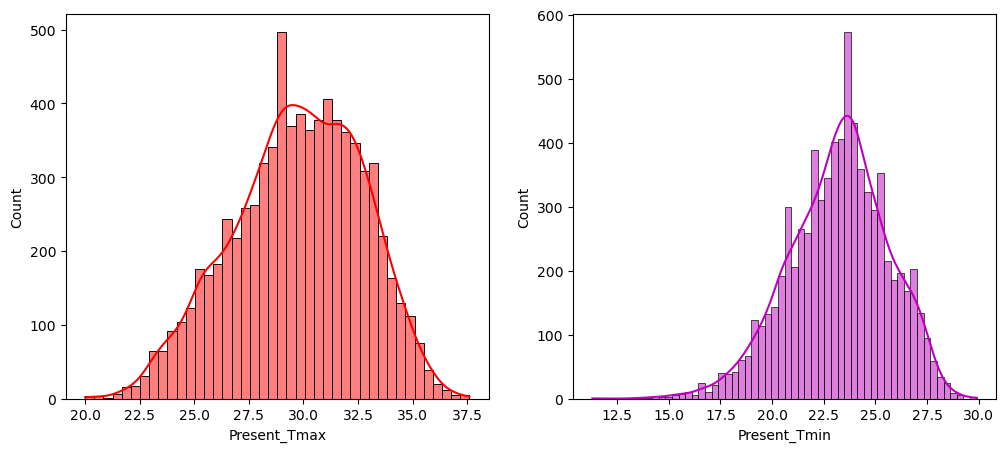

In [17]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

### Comment:
- For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.



## Lets find out maximum and minimum Temperature over period


In [18]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())


Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801227
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377487


- Checking where actually these minima and maxima occur


In [20]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]


station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
5717      5082.563477       37.0       27.8    8     11  2016

In [21]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]


station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
7725       4614.76123       23.8       15.1   30      8  2017

In [22]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]


station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
2397      5360.226563       31.3       24.8    8      2  2014

In [23]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]


station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
6116      4539.616699       24.6       17.1   27      8  2016

### Observation:
- Present Maximum Temperature Maxima over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
- We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. This might implies that humidity and temperature are inversely related.We will try to verify this.
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.




## Let Visualise & gain insight over this by plotting line plot over all station.

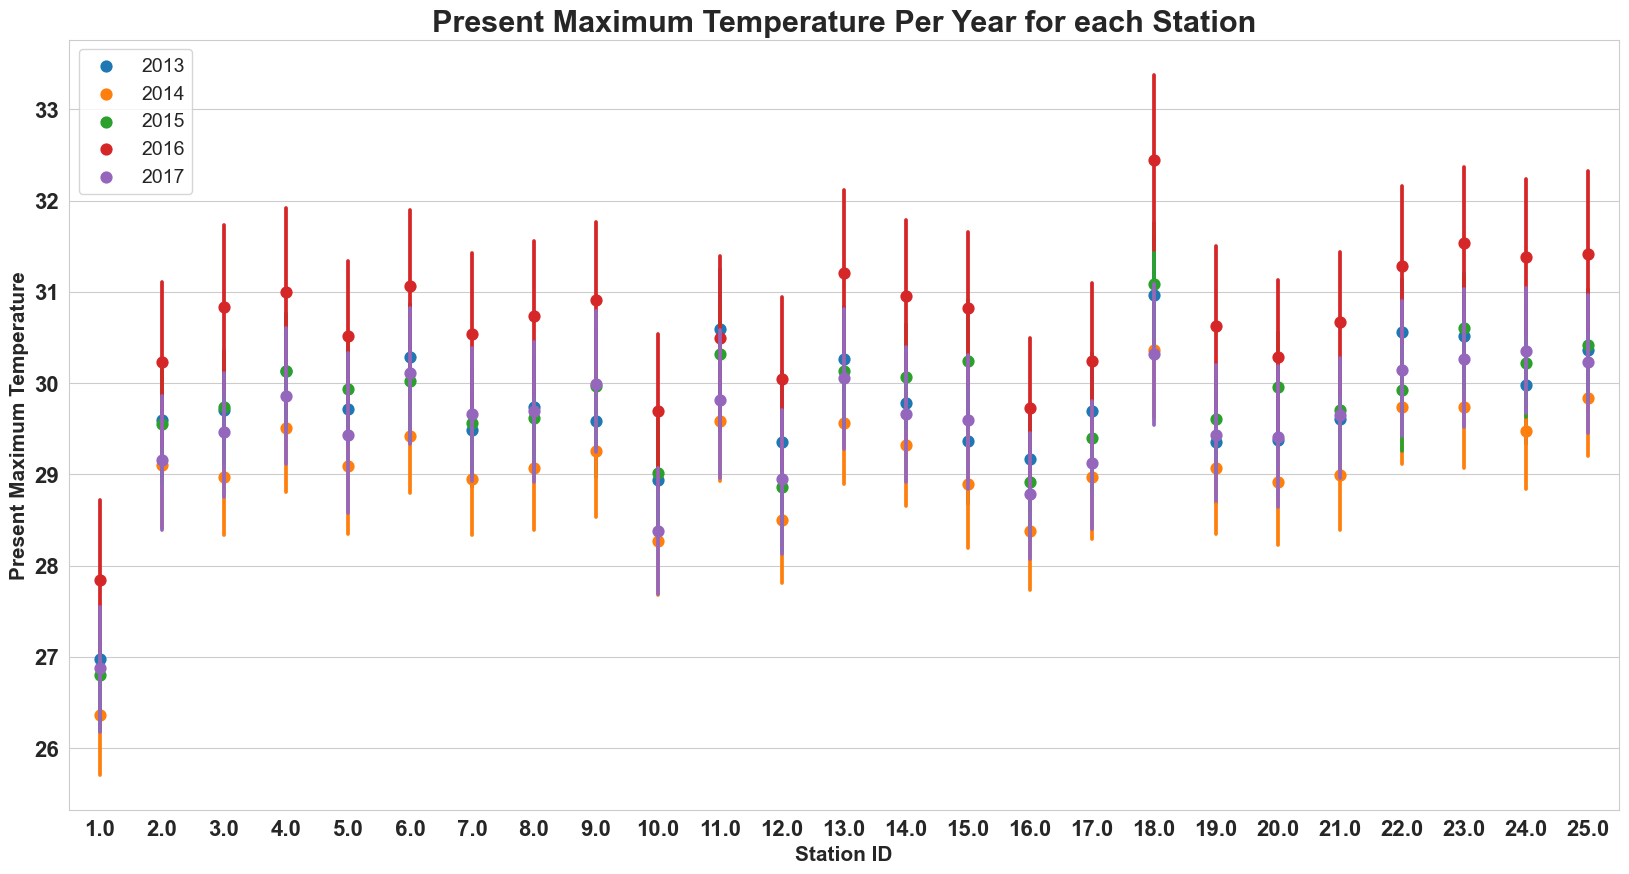

In [24]:
#Line Plot of Present Temperature Maximum over each Station
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)


### Observation on line plot of Present Maximum Temperature:
- Over all four year higher temperature recorded at station 18 in compare to rest.
- Station 1 is coolest station over all timeframe.
- We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
- Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017 !!!



#### Line Plot of Present Temperature Minimum over each Station

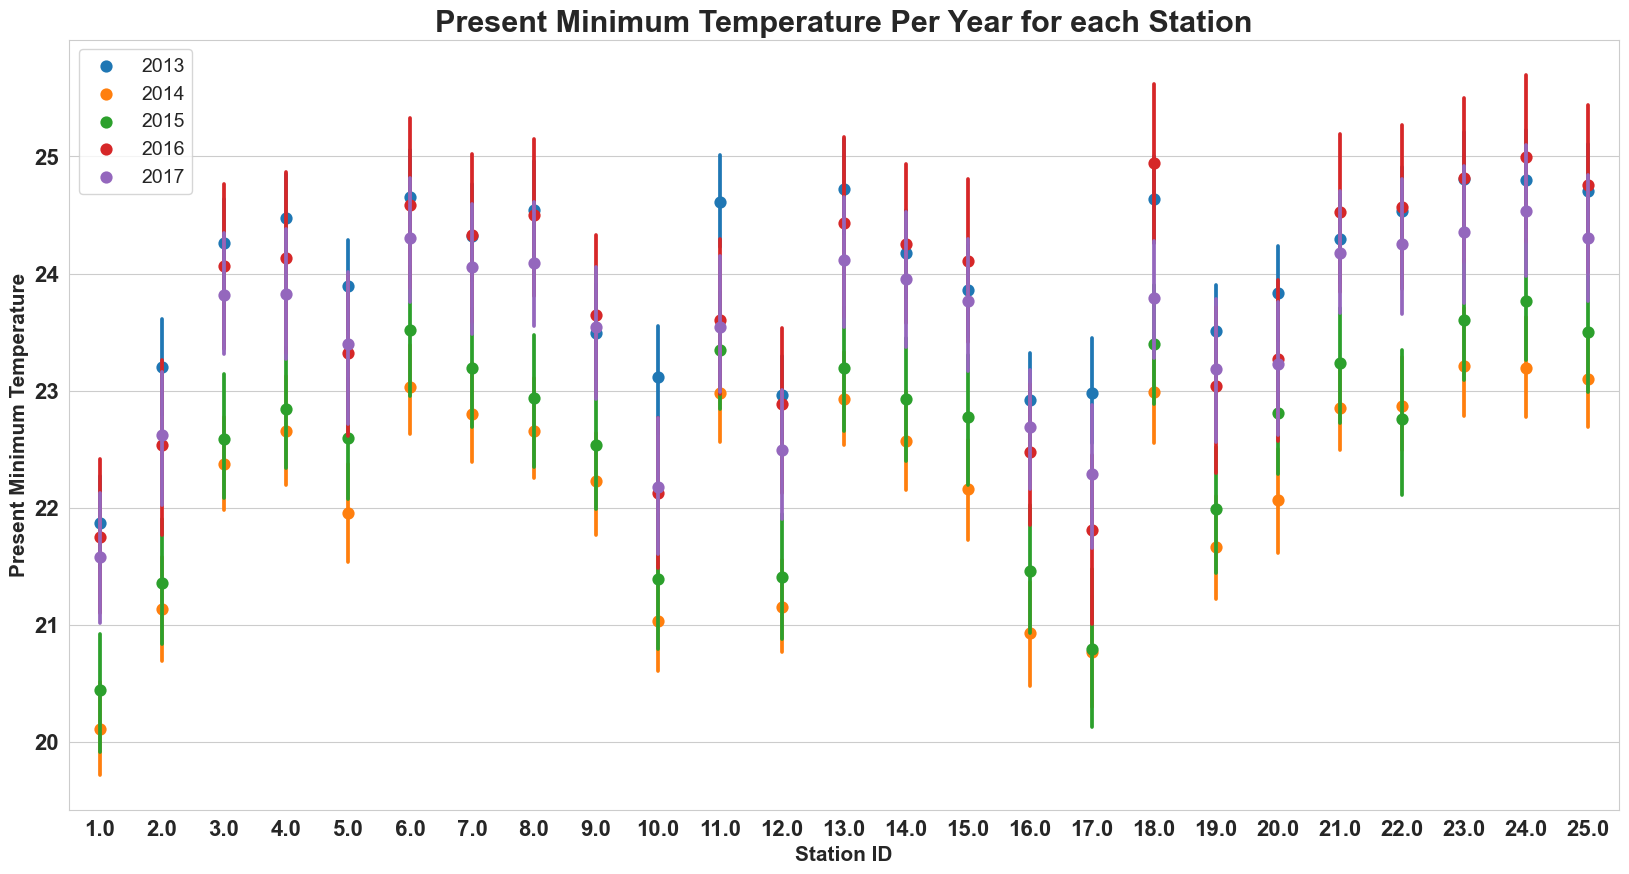

In [25]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

### Observation on line plot of Present Minimum Temperature:
- Year 2014 is coolest year of all time frame.
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

<AxesSubplot:xlabel='Month', ylabel='Solar radiation'>

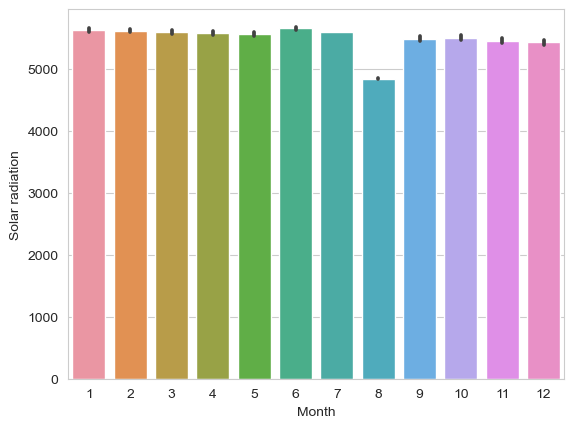

In [26]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Solar radiation'>

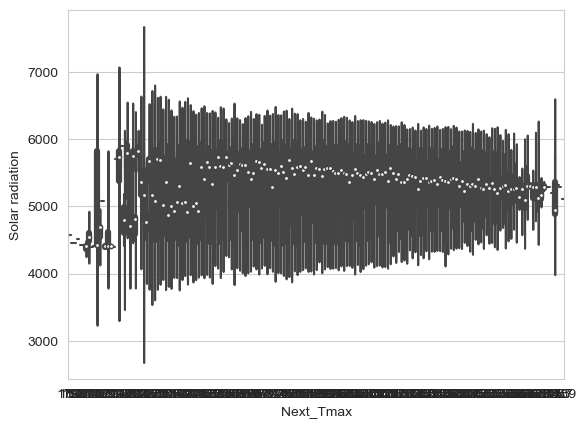

In [27]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])


## Exploration of Target Variable


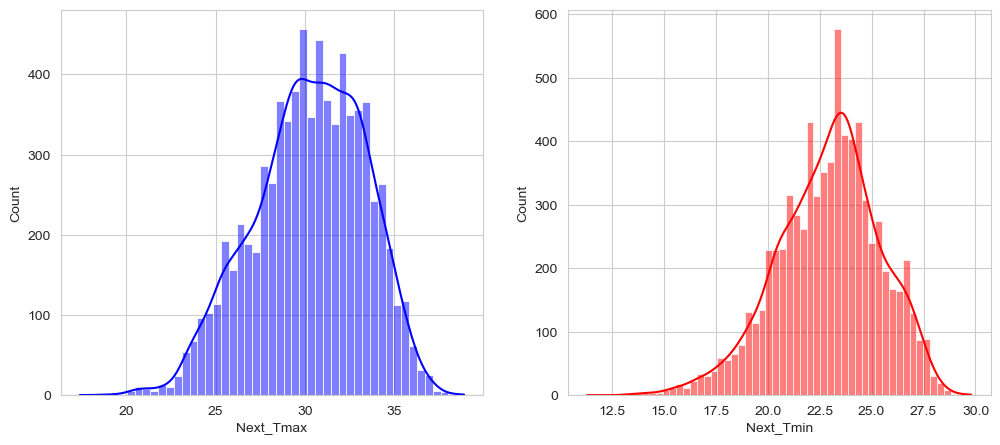

In [28]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

### Comment:
We get same result as we get in case of present temperature.

- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

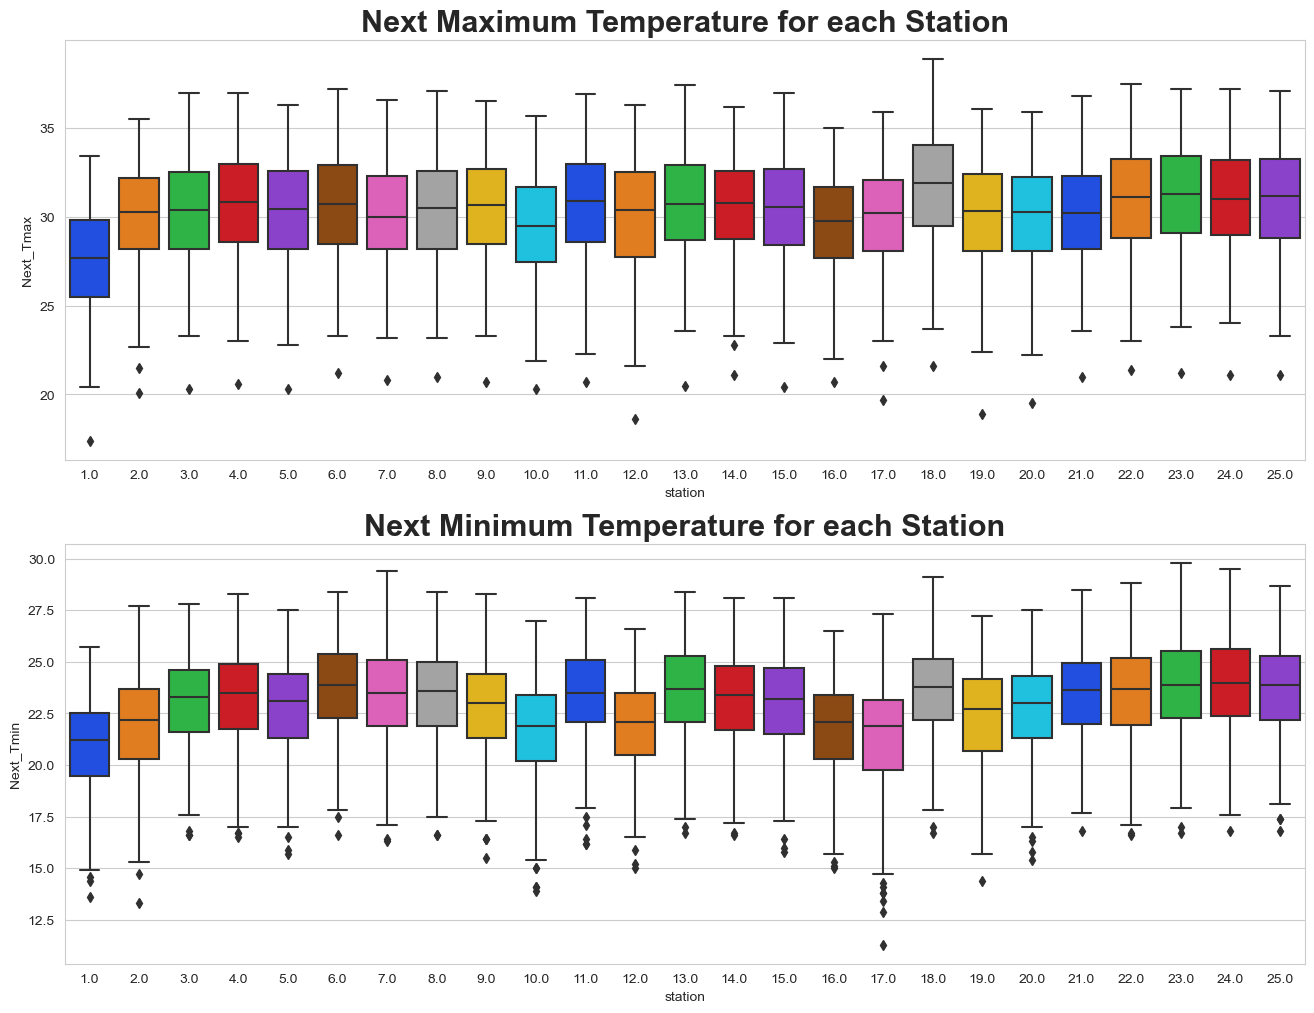

In [29]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'],data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(df['station'],df['Next_Tmin'],data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()


### Observation :
From the box plot

- we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

## Next Maximum Temperature Vs Cloud cover
 

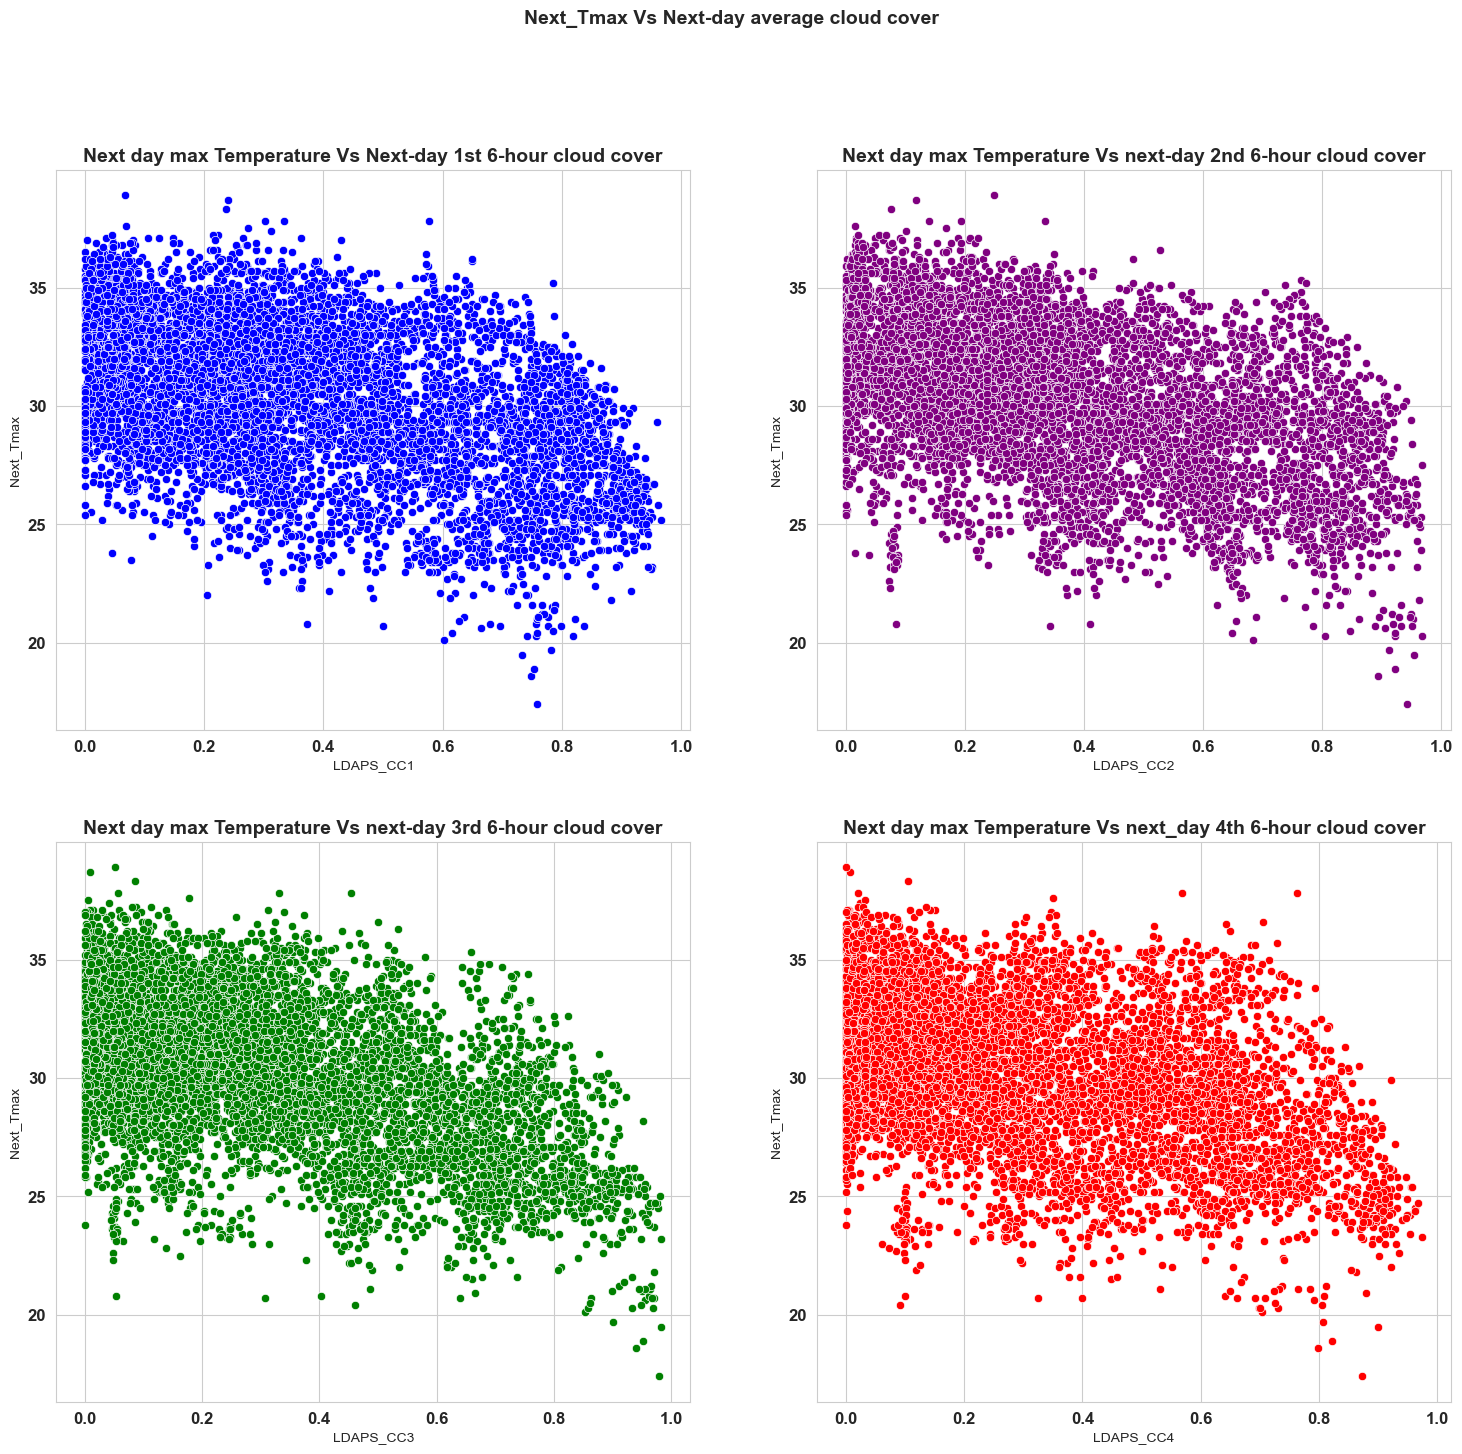

In [31]:
#Comparing Next day maximnum temperature and next day average 
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Observation:


Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.

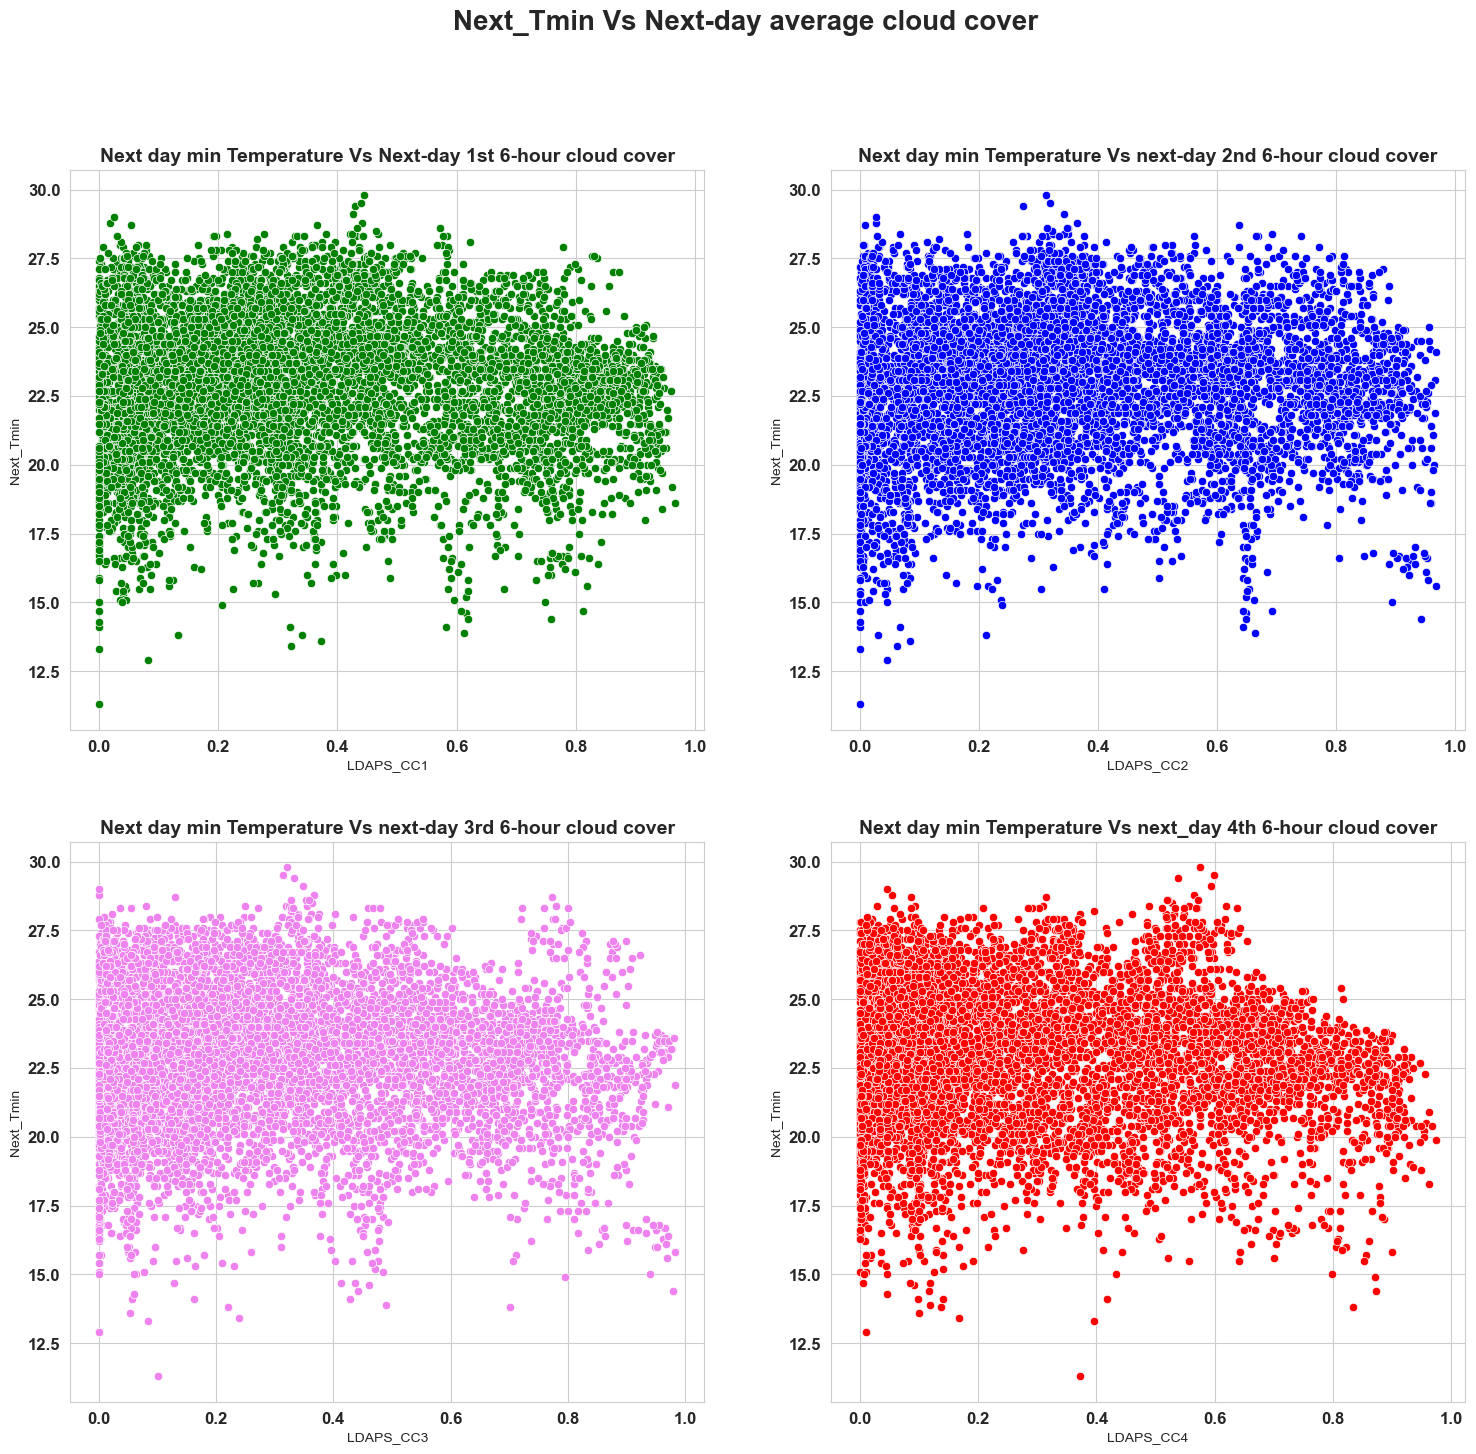

In [32]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
asns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Observation:
No significant relation between Next_Tmin and cloud cover in scatterplot.

- We can say that Next_Tmin remains unaffected by cloud cover.

Solar radiation might most impact on Cloud cover and precipitation, its time to explore them.

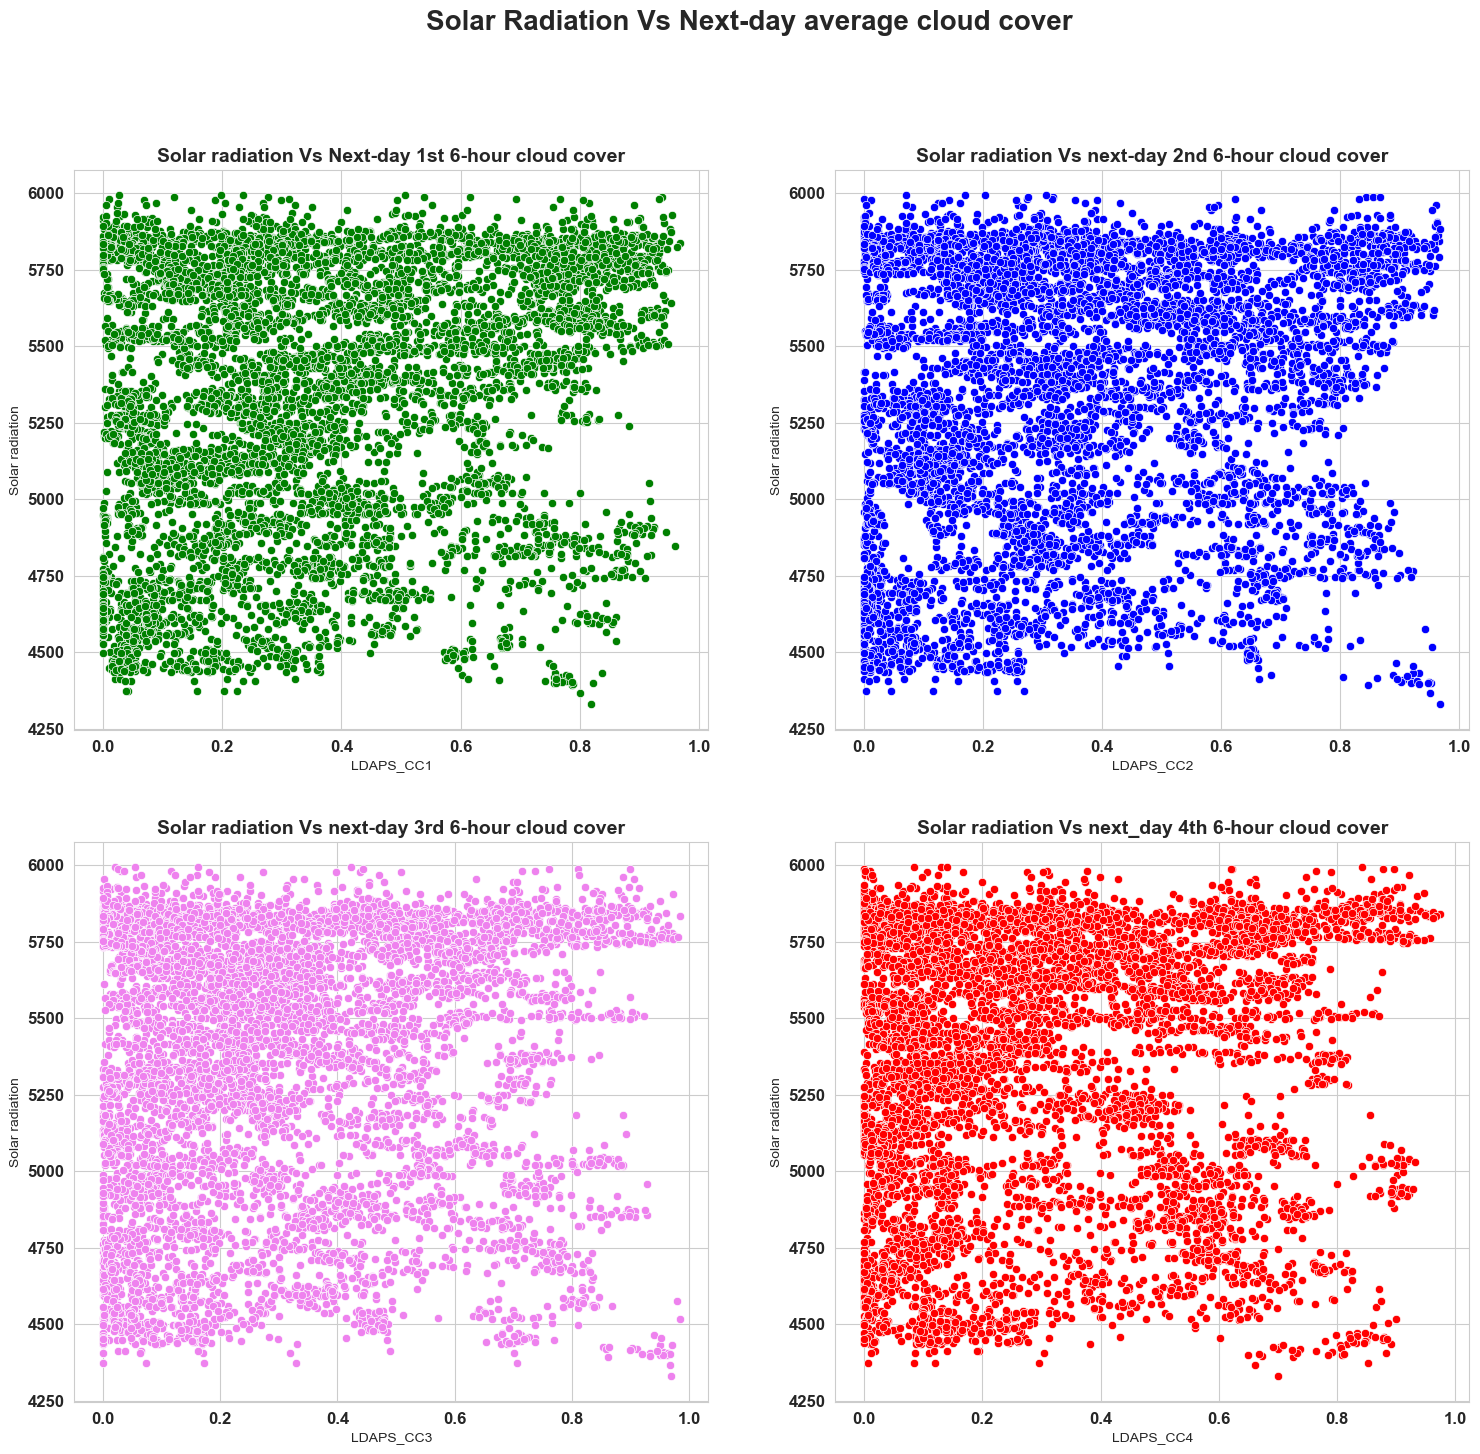

In [33]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Observation:
We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.




## Precipitation VS Solar radiation

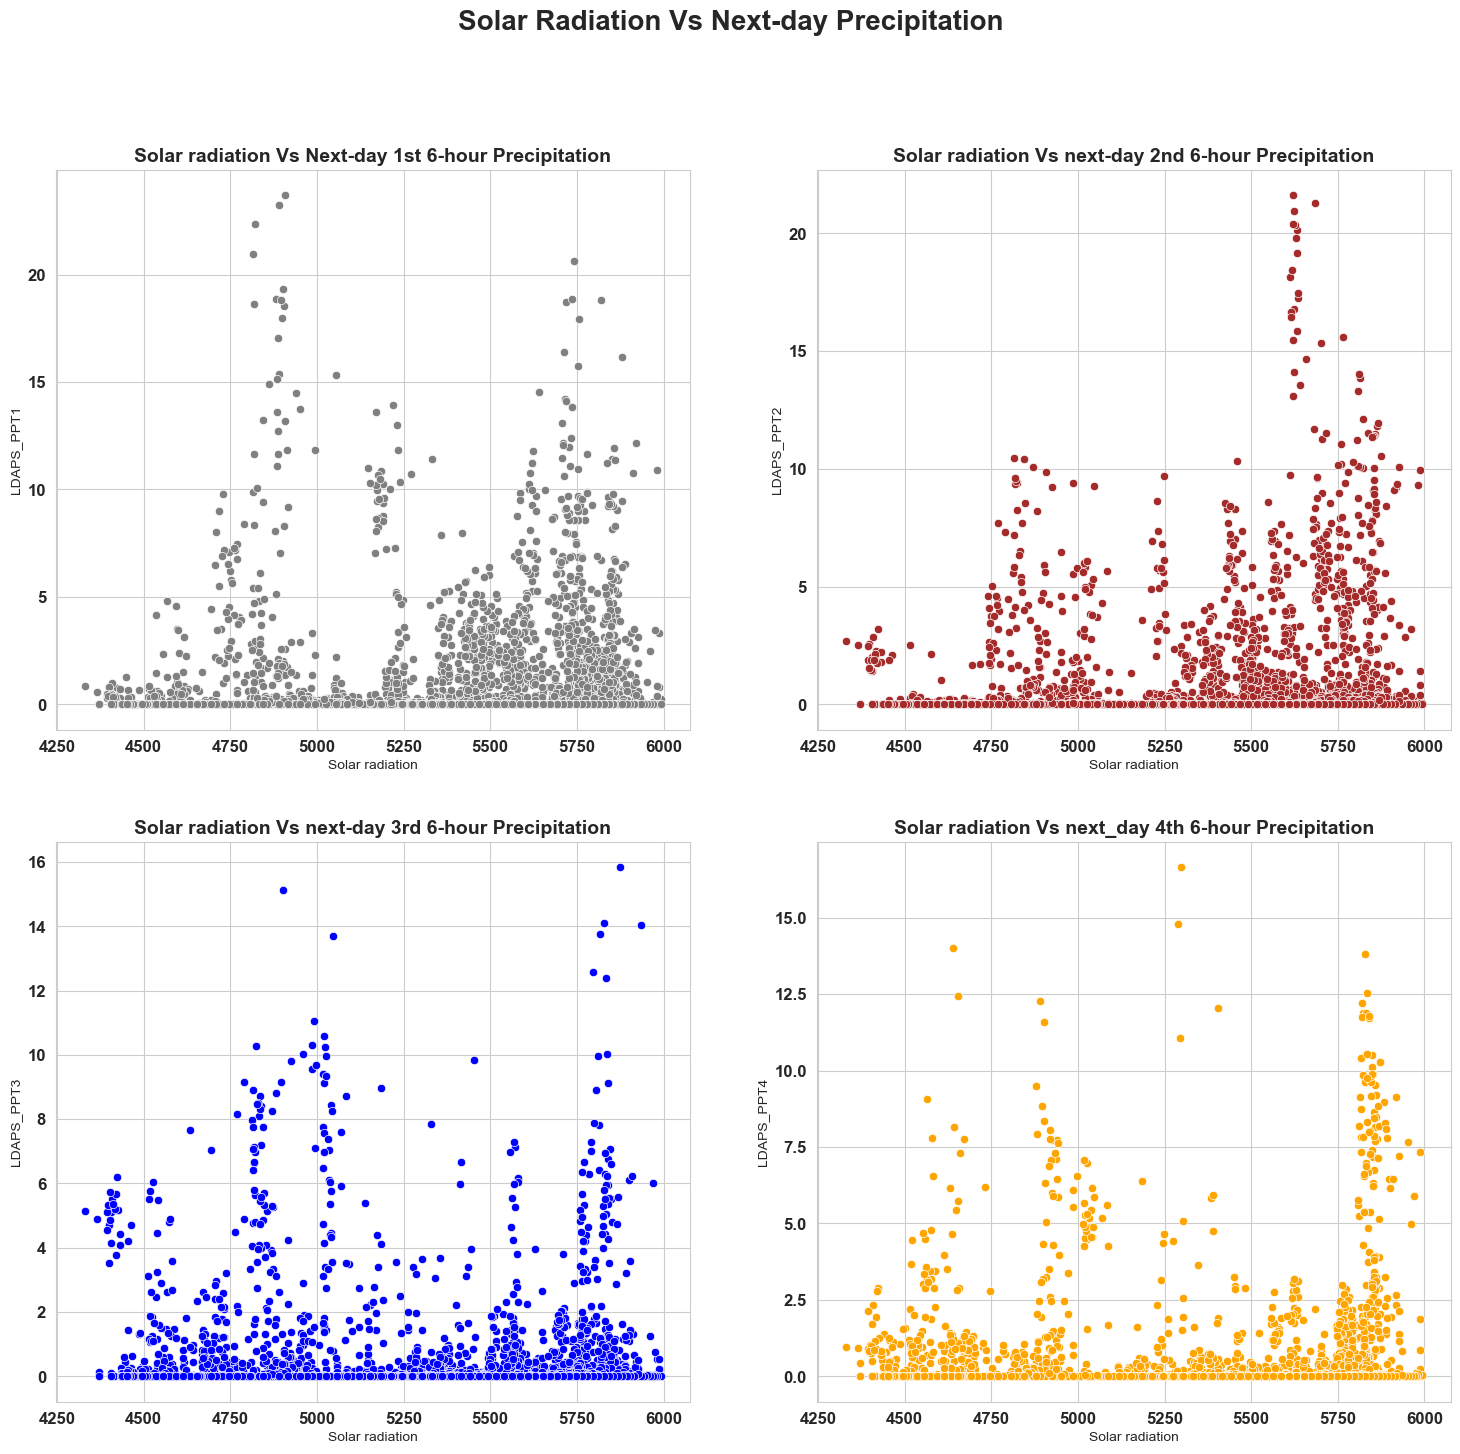

In [34]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Observation:
- Irrespective of to which 6 hr quarter reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
- if we consider scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.



##### This all give rise to few questions here :
    1.Where relative humidity and wind speed fit in this equation of precipitation?
    2.Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.
    3.Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?
    4.What is variation in precipitation,cloud cover and wind speed over year period?
    5.Variation of temperature over duration of one year period?
    
    
    
    
## Lets start investigation from last question.

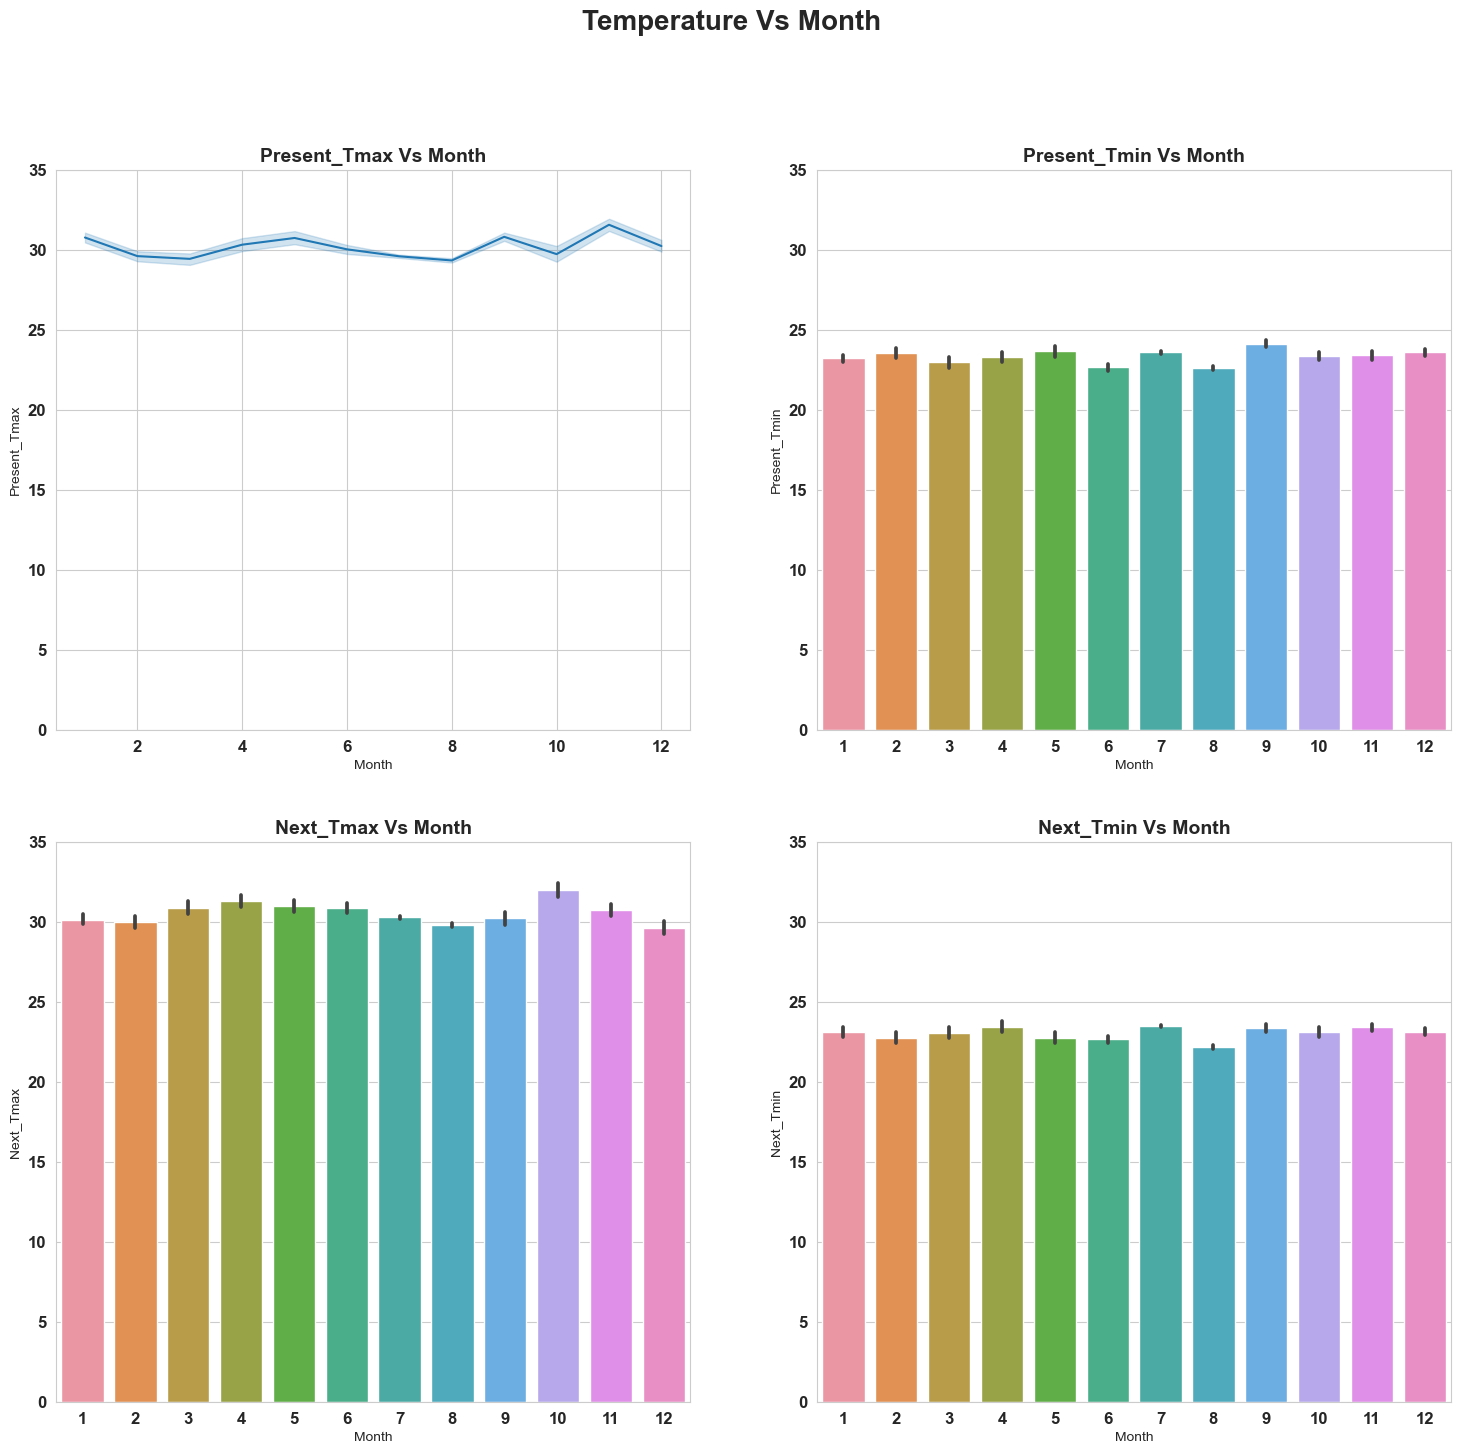

In [35]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

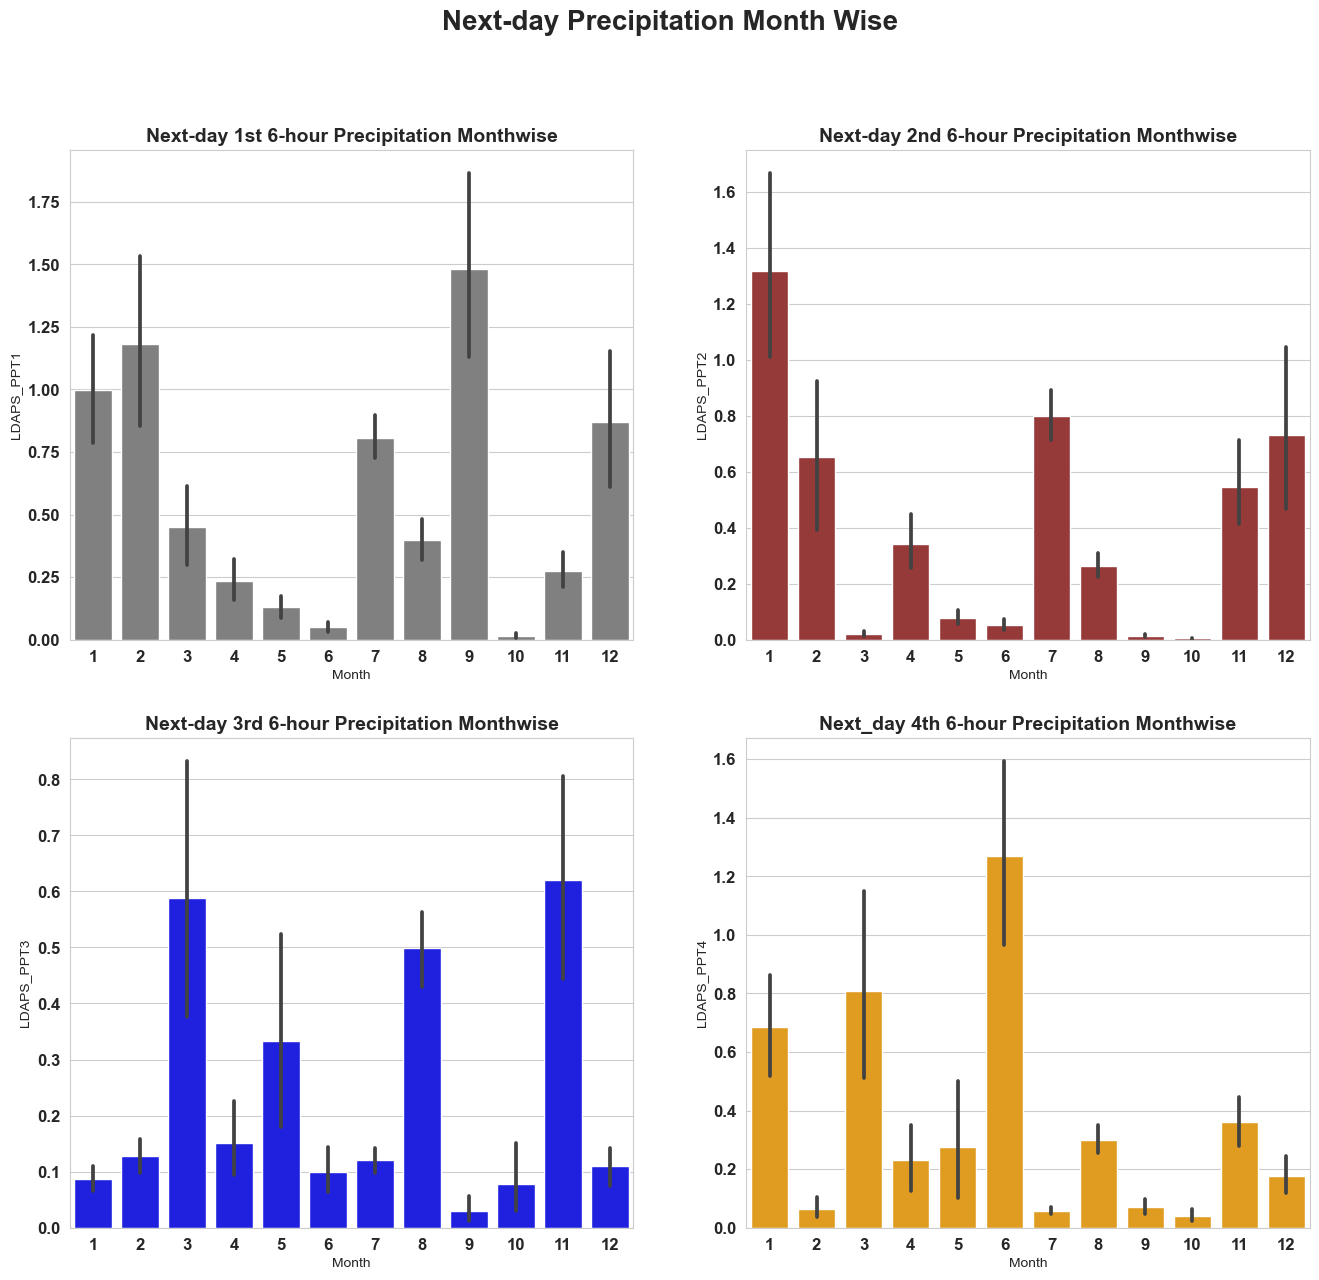

In [36]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Comment :
- In 9th Month highest precipitation observe in 1st quarter of day.
- In 1th Month highest precipitation observe in 2ed quarter of day.
- In 11th Month highest precipitation observe in 3rd quarter of day.
- In 6th Month highest precipitation observe in 4st quarter of day.

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.72420785672


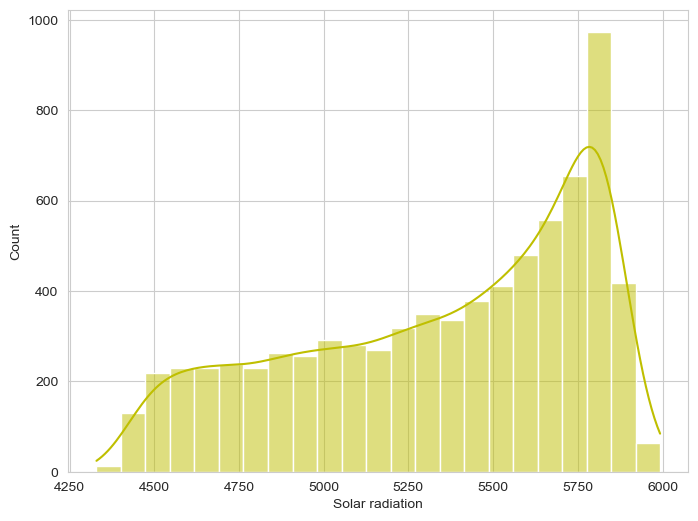

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())


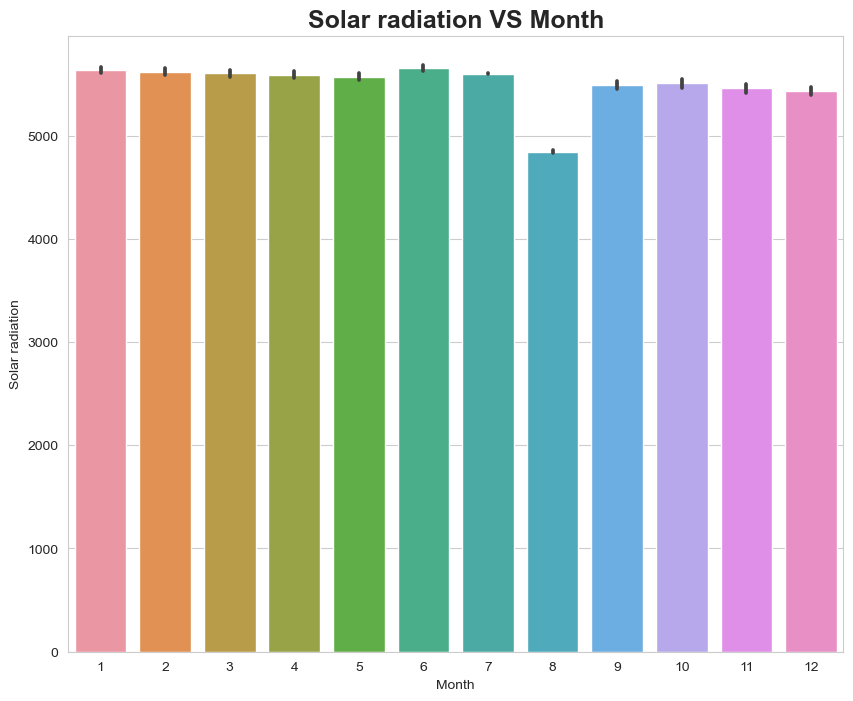

In [38]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()



### Comment :
- Solar Radiation data is left skewed.
- It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.
- For most of reading solar radiation values lies in the range 5600 to 5850.
- Minimum solar radiation occur in month of 8.

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.094096699159837 m/s


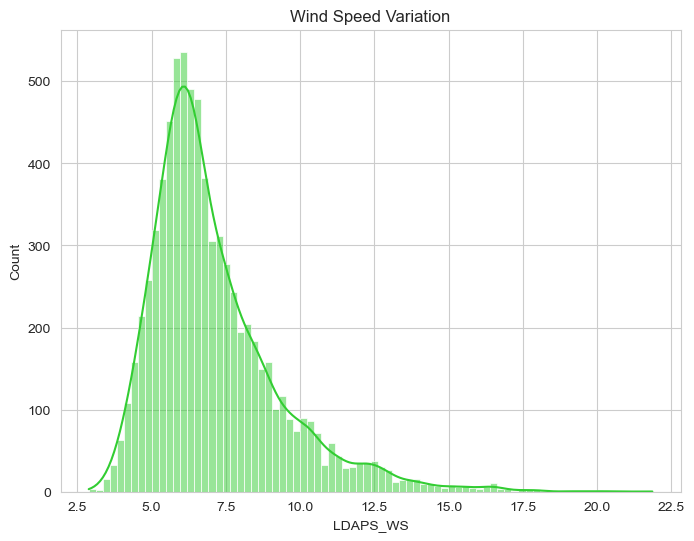

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')


### Comment :
- It have its minimum value at 2.88m/s and maximum values at 21.85m/s
- For most of reading values lies in the rabge 5m/s to 8m/s
- Graph is slightly right skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


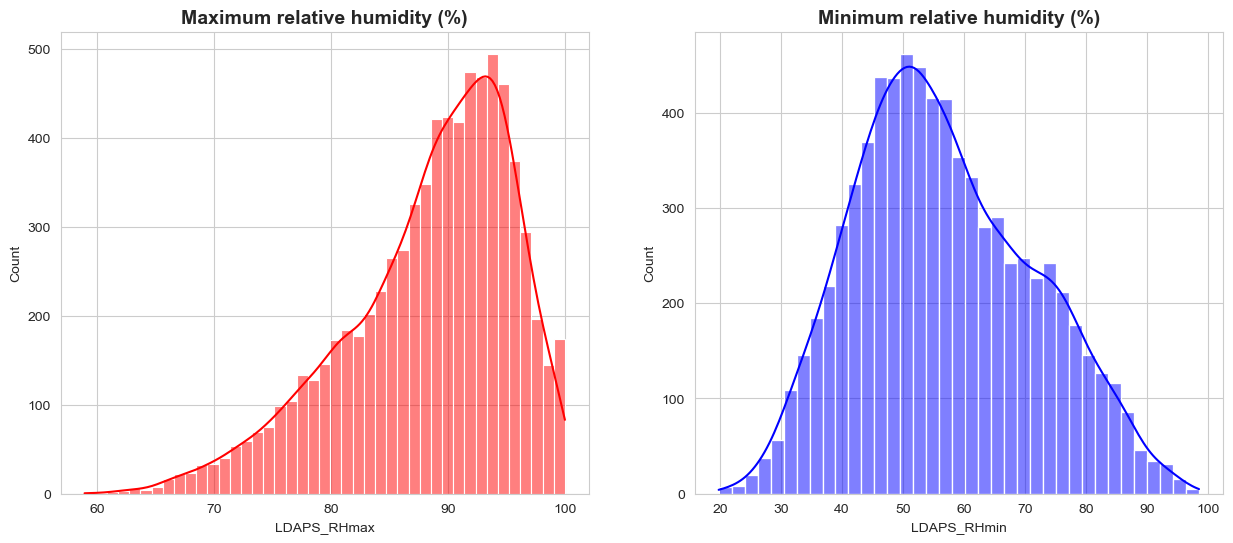

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))


### Comment :
- Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.
- Maximum Relative humidity for most of the days lie in the range 90 to 97
- Maximum Relative humidity lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


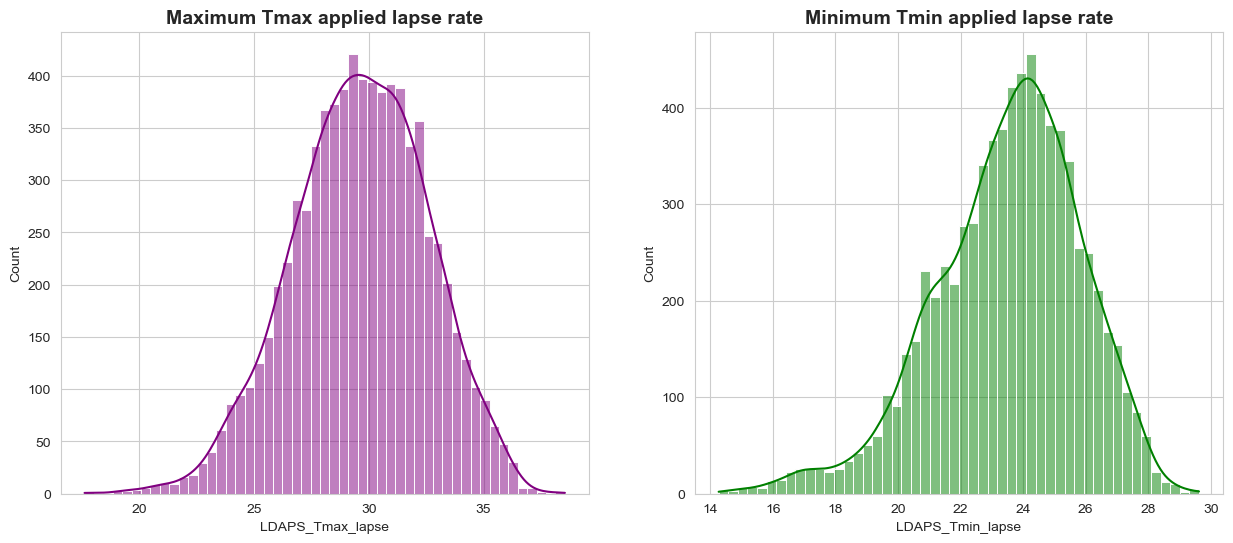

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))


### Observation :
- Tmax and Tmin for applied lapse rate are almost normally distributed.
- Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C).
- Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988046


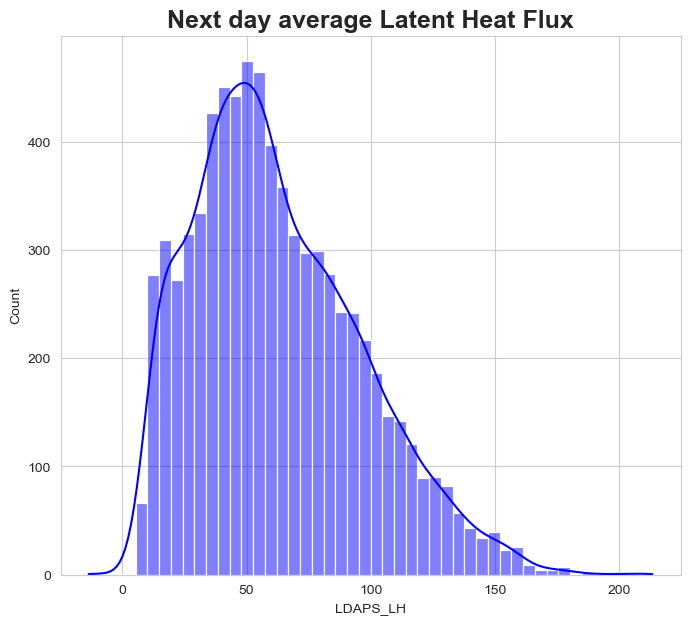

In [42]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())


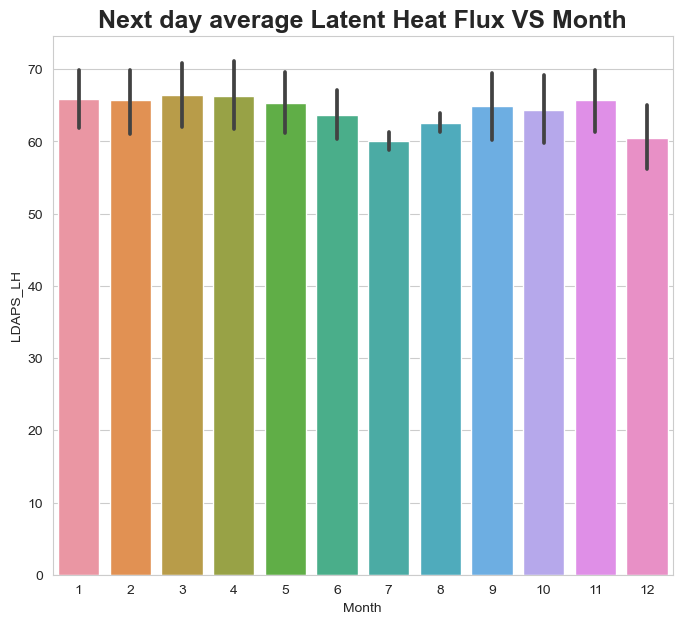

In [43]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

## Encoding categorical data

In [37]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [38]:
# Using Label Encoder on categorical variable
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()


station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [39]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

## Feature selection and Engineering


### 1. Outliers Detection and Removal

In [40]:
df.shape

(7588, 29)

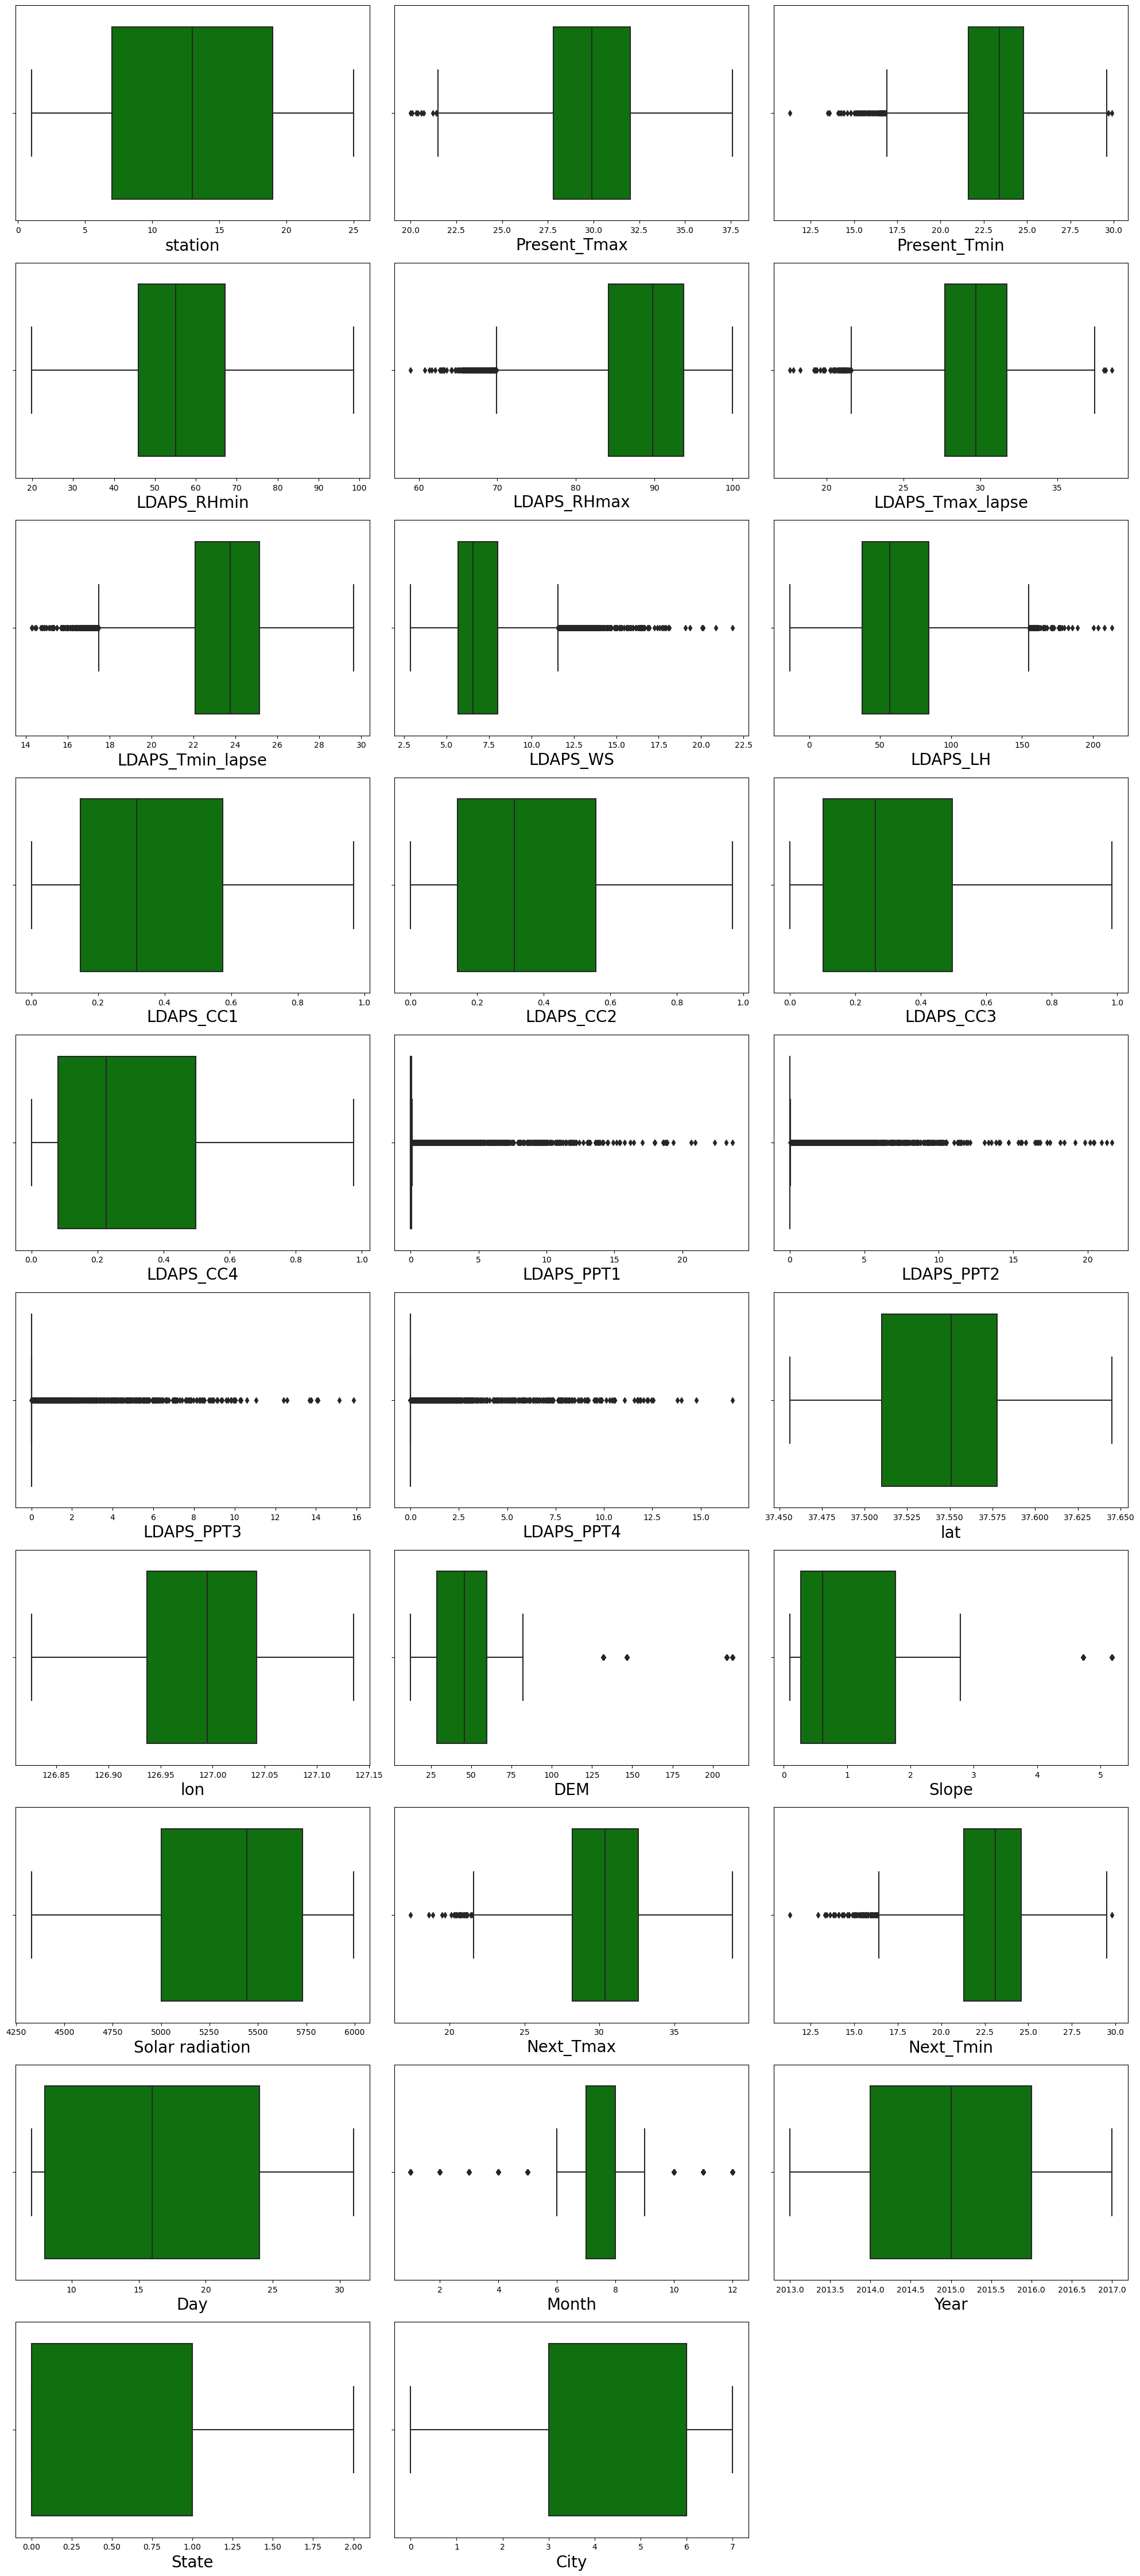

In [41]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


From Boxplot we can see outliers exist dataset.




##  Outliers removal using Zscore method

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name


Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


- We are losing 11.18 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building.


## 2. Skewness of features

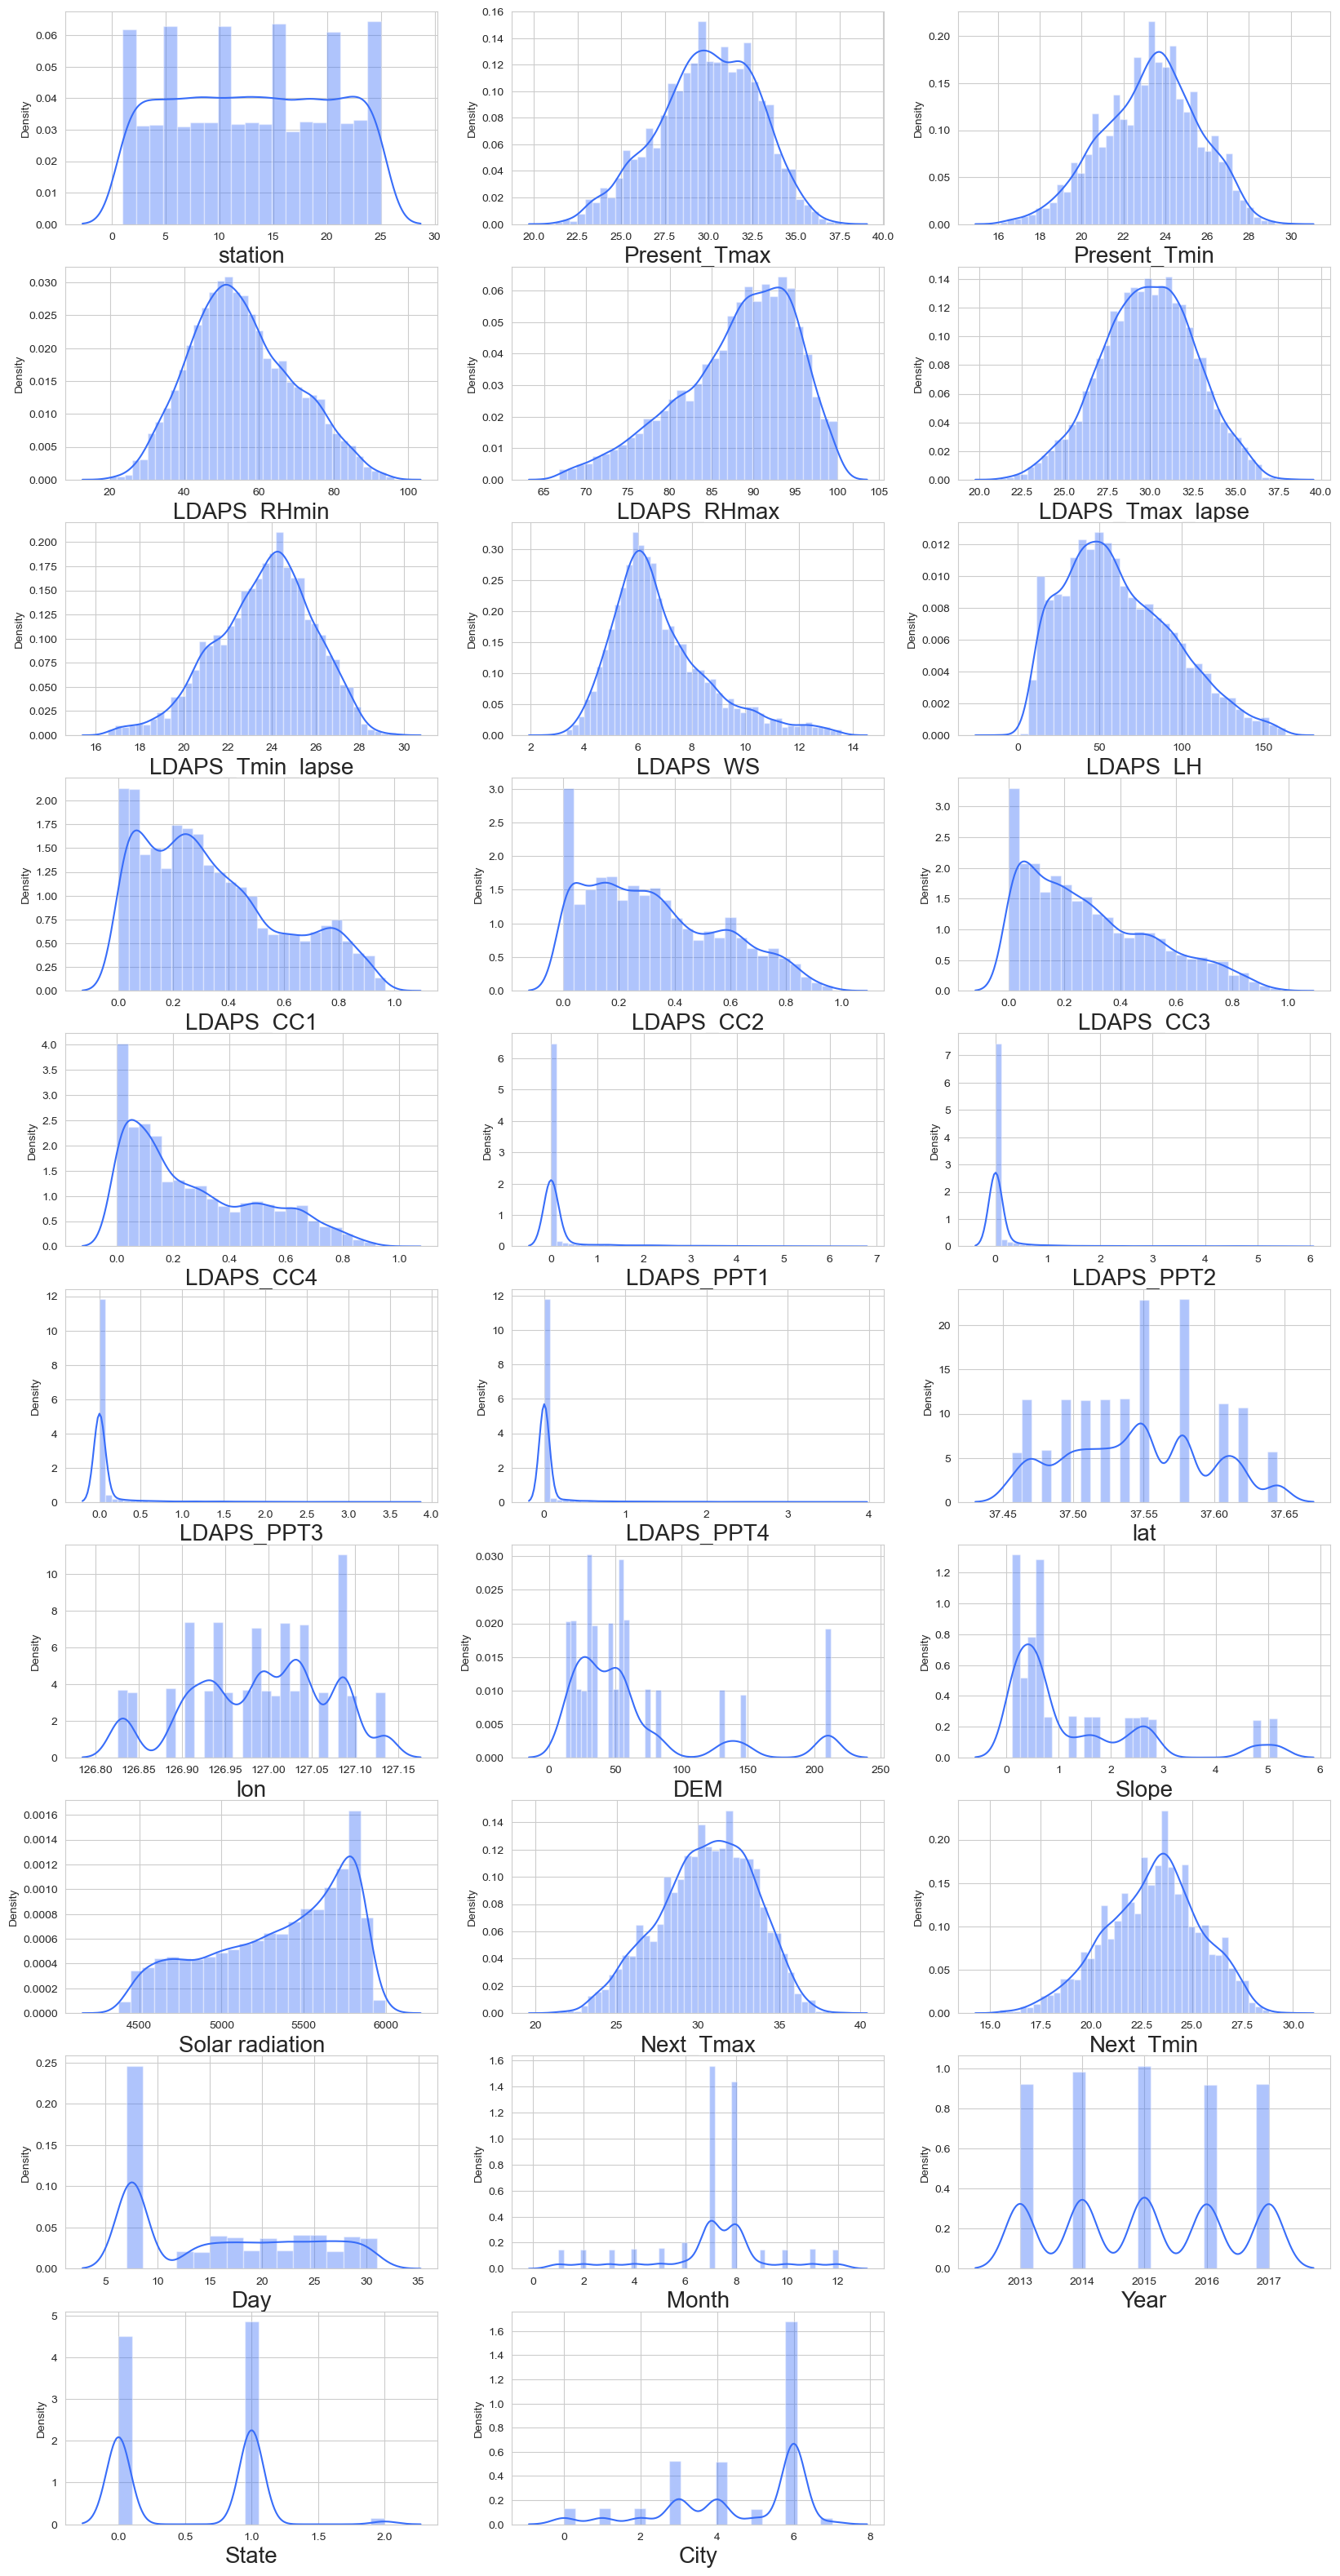

In [60]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

- We also going to ignore sknewness in target feature.

In [43]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

- Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.

In [44]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

- For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced

### 3. Corrleation

In [45]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

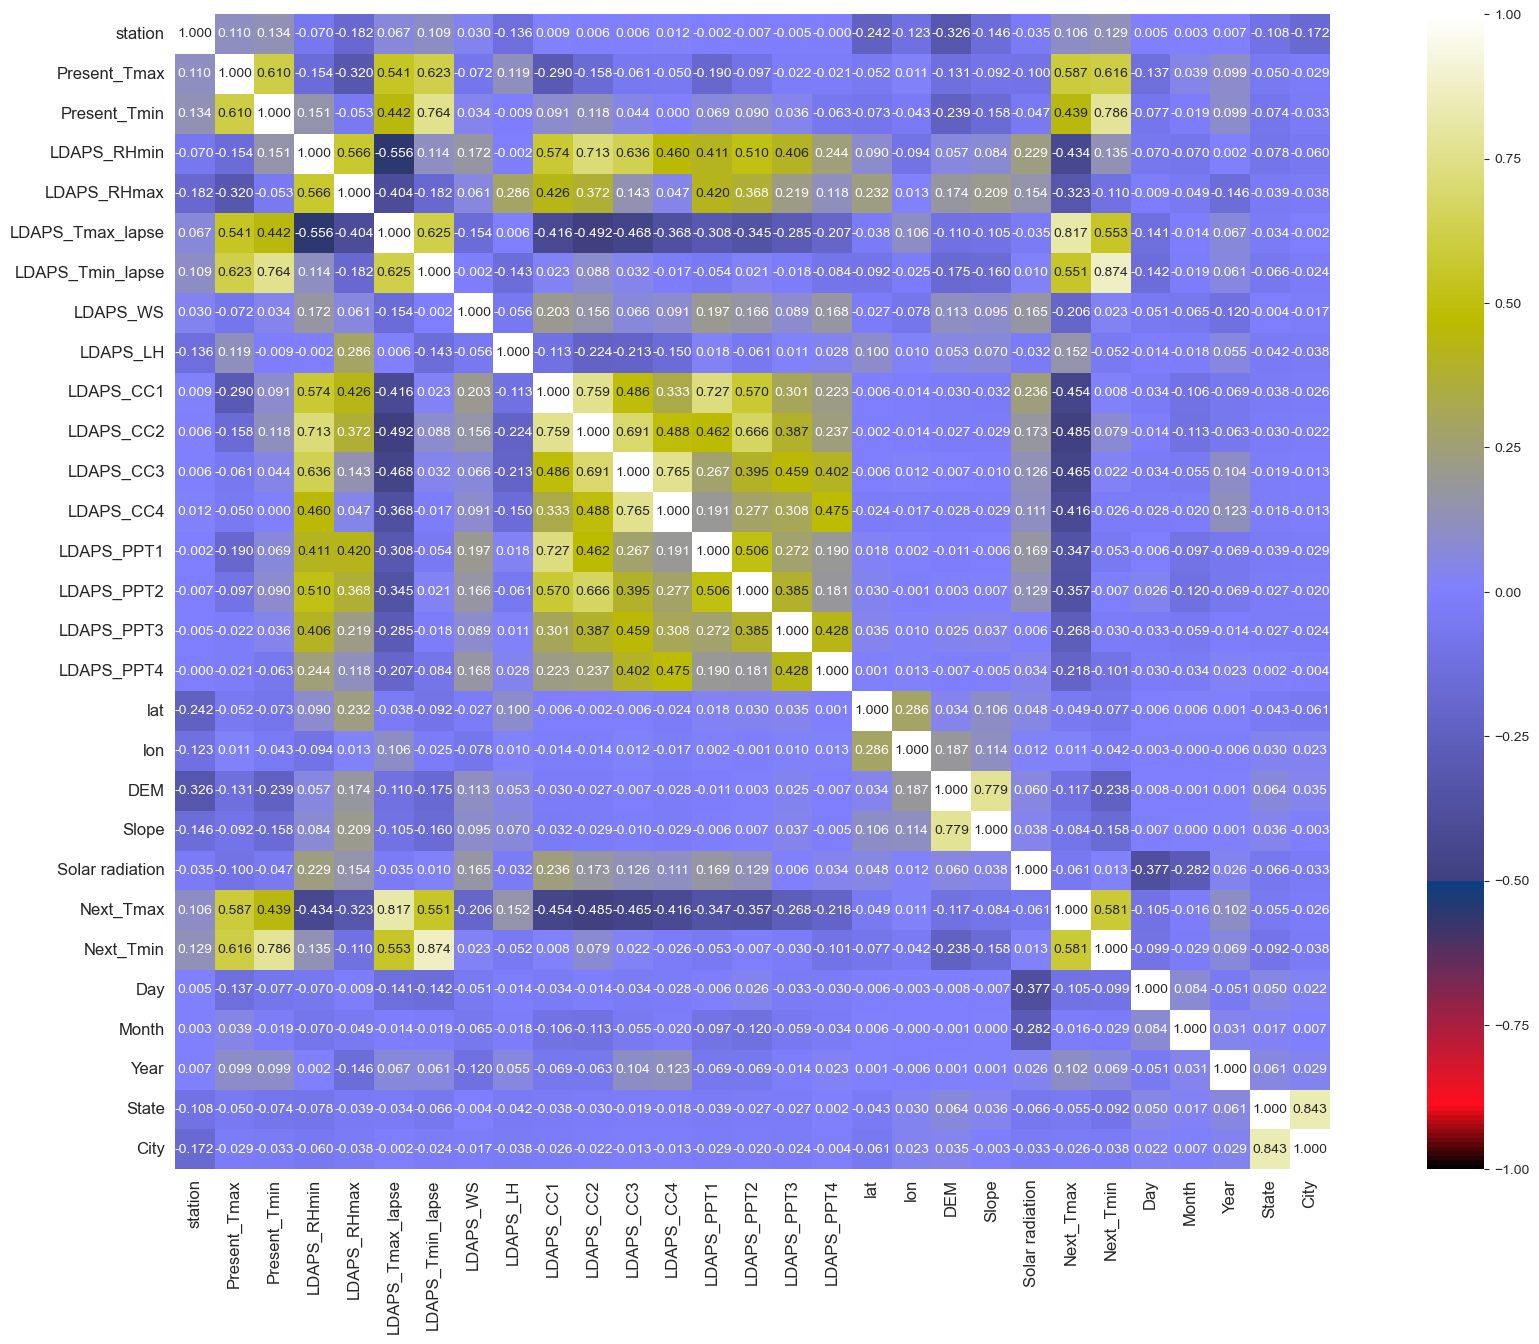

In [64]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

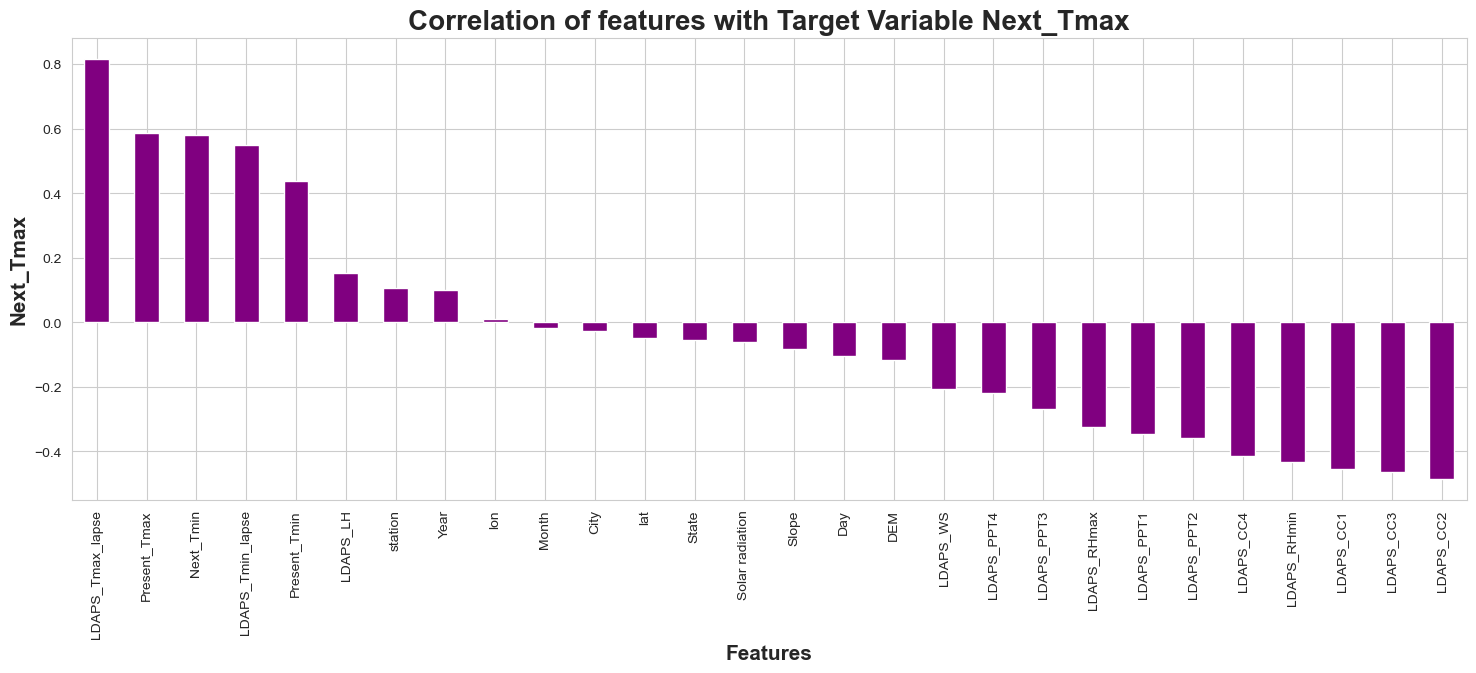

In [65]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

- Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.

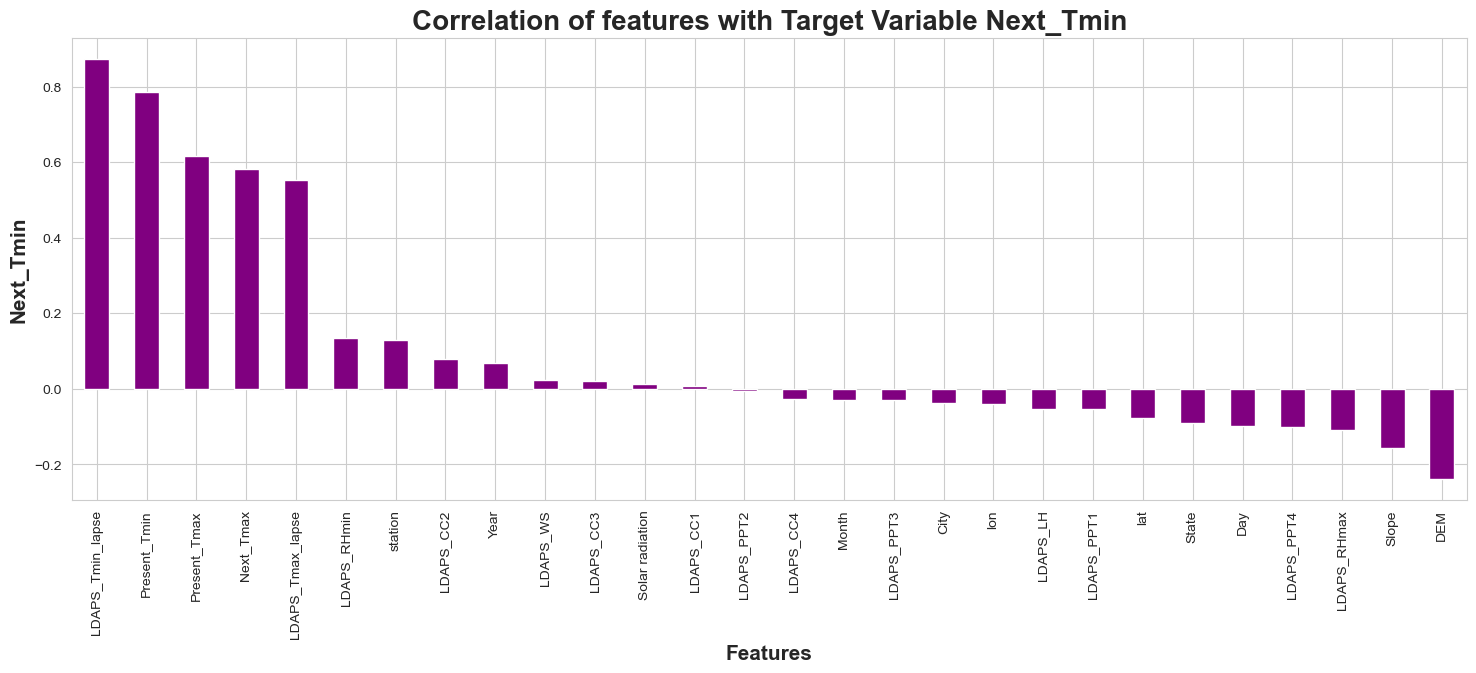

In [66]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()


# Machine Learning Model Building For Next_Tmax



### Standard Scaling

In [46]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.353177           station
1     2.849784      Present_Tmax
2     3.383435      Present_Tmin
3     6.077961       LDAPS_RHmin
4     2.614712       LDAPS_RHmax
5     6.650091  LDAPS_Tmax_lapse
6     8.235731  LDAPS_Tmin_lapse
7     1.225322          LDAPS_WS
8     1.523389          LDAPS_LH
9     4.874106         LDAPS_CC1
10    5.533647         LDAPS_CC2
11    4.567857         LDAPS_CC3
12    2.792518         LDAPS_CC4
13    2.601274        LDAPS_PPT1
14    2.174592        LDAPS_PPT2
15    1.592341        LDAPS_PPT3
16    1.601009        LDAPS_PPT4
17    1.310633               lat
18    1.225664               lon
19    3.382228               DEM
20    2.876560             Slope
21    1.487825   Solar radiation
22    5.674284         Next_Tmin
23    1.259835               Day
24    1.122200             Month
25    1.136580              Year
26    3.615665             State
27    3.641816              City

Independent feature VIF is within permissible limit of 10

# PCA

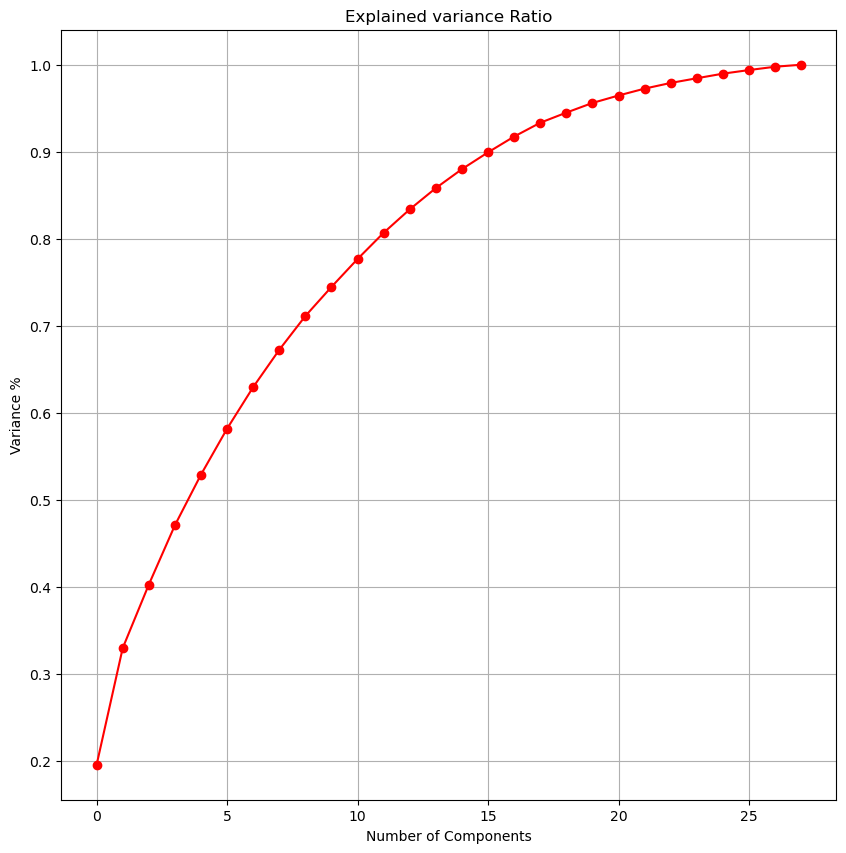

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


### Comment -
AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [50]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [51]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


## Finding best Random state

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)


Best R2 Score is 0.8018242128787927 on Random_state 108


## Linear Regression Base Model

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.91671752 30.15944717 29.11536556 ... 25.88094278 25.16676324
 32.69812886]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [56]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))
 

 Error :
Mean absolute error : 1.014950654634492
Mean squared error : 1.745822572111516
Root Mean Squared Error: 1.3212957928153393


 R2 Score :
0.8018242128787927


In [57]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.669515033801988


## Applying other ML Models

In [58]:
from sklearn.ensemble import BaggingRegressor

In [59]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')




 Error of  RandomForestRegressor() :
Mean absolute error : 0.703928057553957
Mean squared error : 0.8745605314748205
Root Mean Squared Error: 0.9351794113830888


 R2 Score :
0.9007248935379825


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6081335431654681
Mean squared error : 0.6496104671762596
Root Mean Squared Error: 0.805984160623681


 R2 Score :
0.9262599374579473


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0484262589928057
Mean squared error : 2.071236510791367
Root Mean Squared Error: 1.4391791100455034


 R2 Score :
0.7648850848893463


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1473894531093483
Mean squared error : 1.9877737333897851
Root Mean Squared Error: 1.4098842978733344


 R2 Score :
0.7743593017262128


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8346665607054449
Mean squared error : 1.1558048392071767
Root Mean Squared Error: 1.0750836428888575


 R2 Score :
0.8687996492728634


 Error of  XGBRegr

In [60]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')





Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6839869897303503


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6917720232019818


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.42726456837084975


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6540937441131297


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7075802202869532


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, ma

## Hyper Parameter Tuning : GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [63]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-67.166 total time=   1.4s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-68.411 total time=   1.7s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-78.622 total time=   1.7s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-75.156 total time=   2.5s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimator

In [ ]:
GCV.best_params_

# Final Regression Model

In [64]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6080352783203125
Mean squared error : 0.6357336681989149
Root Mean Squared Error: 0.7973290840041612


 R2 Score of Final Model :
0.9278351522615524




 True Values Vs Predicted Value plot :


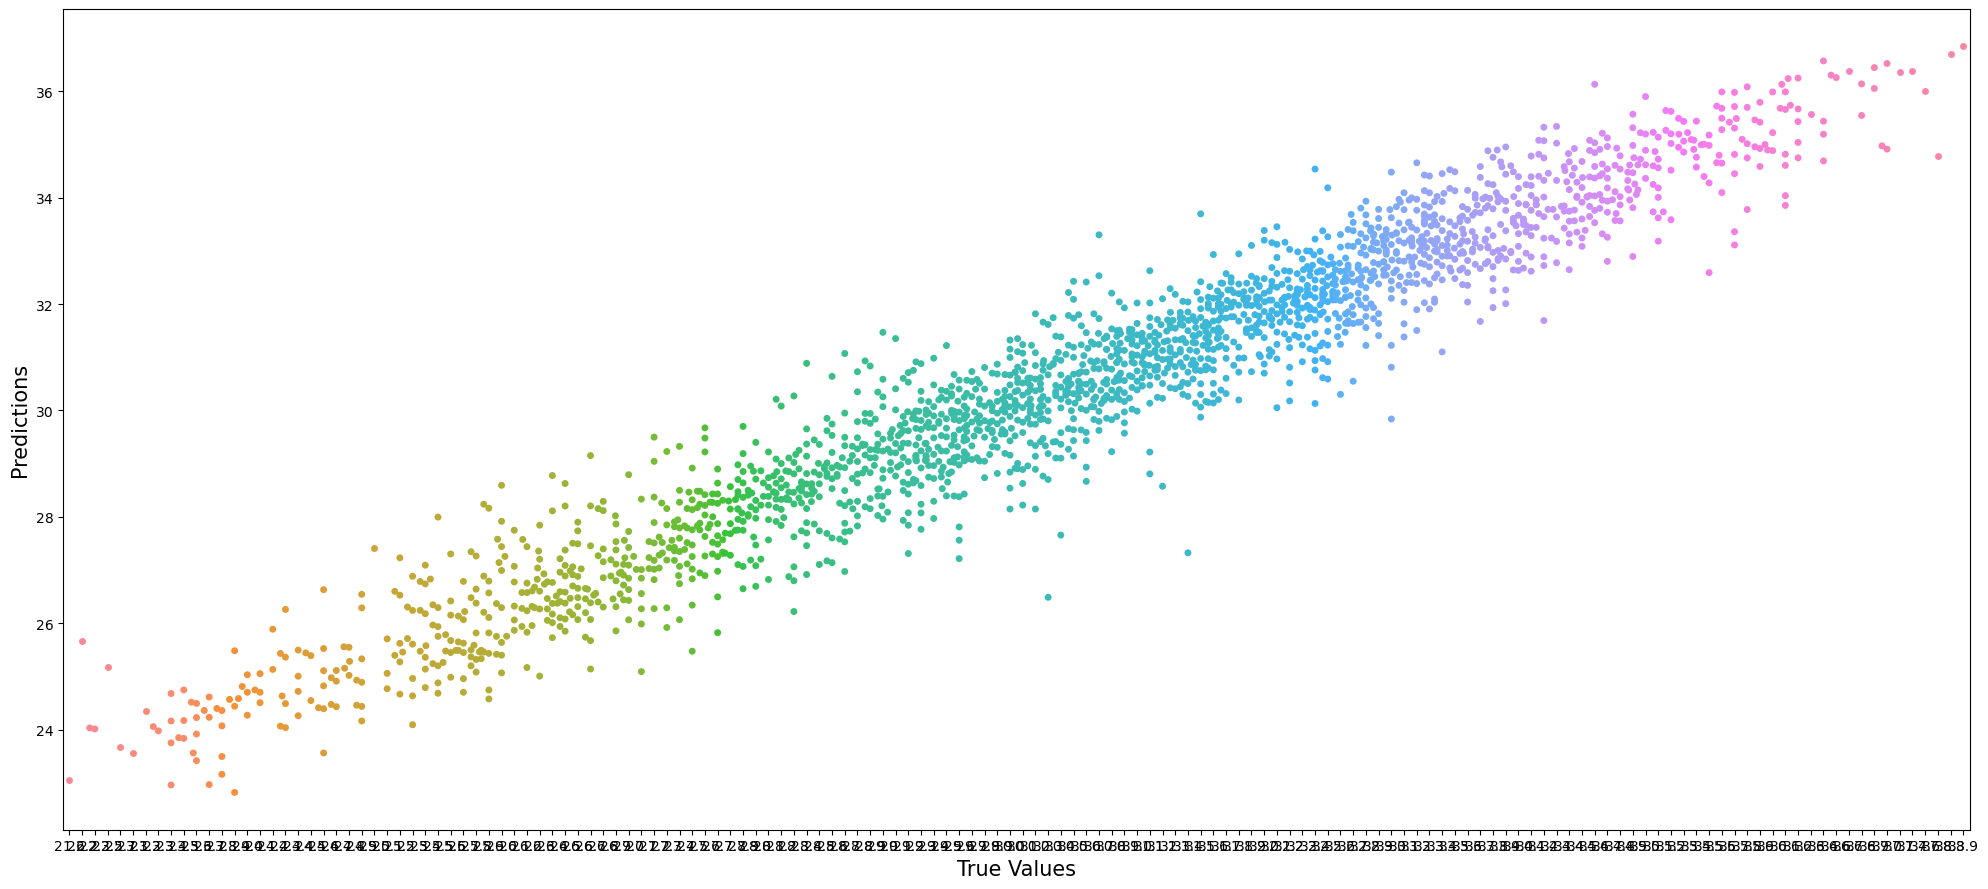

In [65]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Final Regression Saving Model

In [66]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

# Prediction According Final Regression Model

In [68]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 


Actual Values  Predicted Values
0              32.0         31.368290
1              30.1         30.052000
2              27.8         28.297882
3              27.6         27.264318
4              29.8         30.213346
...             ...               ...
2219           36.7         36.381721
2220           35.4         34.757820
2221           28.4         26.916483
2222           24.0         24.272707
2223           32.6         32.162075

[2224 rows x 2 columns]

## Machine Learning Model Building For Next_Tmin

In [ ]:
# Standard Scaling

In [69]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


## Finding best Random state

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)


Best R2 Score is 0.851243375635281 on Random_state 43


## Linear Regression Base Model

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.43531019 24.60008496 23.1360548  ... 22.51619756 26.46938431
 25.3600731 ]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


## Linear Regression Evaluation Matrix


In [74]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))
 

 Error :
Mean absolute error : 0.7363156513347725
Mean squared error : 0.8575992359401748
Root Mean Squared Error: 0.9260665396936523


 R2 Score :
0.851243375635281


In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7878211798629869


## Applying other ML Models

In [76]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')

 



 Error of  RandomForestRegressor() :
Mean absolute error : 0.550980665467626
Mean squared error : 0.5213205678956833
Root Mean Squared Error: 0.7220253235833791


 R2 Score :
0.9095732777711221


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5231101618705035
Mean squared error : 0.4745850732913668
Root Mean Squared Error: 0.6889013523657554


 R2 Score :
0.9176798782950043


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8278776978417265
Mean squared error : 1.2473561151079136
Root Mean Squared Error: 1.1168509816031473


 R2 Score :
0.7836373013314029


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8301704312462431
Mean squared error : 1.056403181677302
Root Mean Squared Error: 1.0278147603908507


 R2 Score :
0.8167594318082778


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.605091307671664
Mean squared error : 0.5923914804848138
Root Mean Squared Error: 0.7696697216889943


 R2 Score :
0.897245527693676


 Error of  XGBRegre

In [77]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')





Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.792120693995607


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7955791494466041


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6166438410934019


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.743571312996868


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8030975482147745


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_l

## Hyper Parameter Tuning : GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [80]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-87.675 total time=   0.3s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-82.833 total time=   0.2s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-81.296 total time=   0.2s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-89.509 total time=   0.2s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [81]:

GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 8,
 'n_estimators': 100}

## Final Regression Model For Next_Tmin

In [82]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.45019563350746106
Mean squared error : 0.3523205939839207
Root Mean Squared Error: 0.5935659980018403


 R2 Score of Final Model :
0.9388875128861742




 True Values Vs Predicted Value plot :


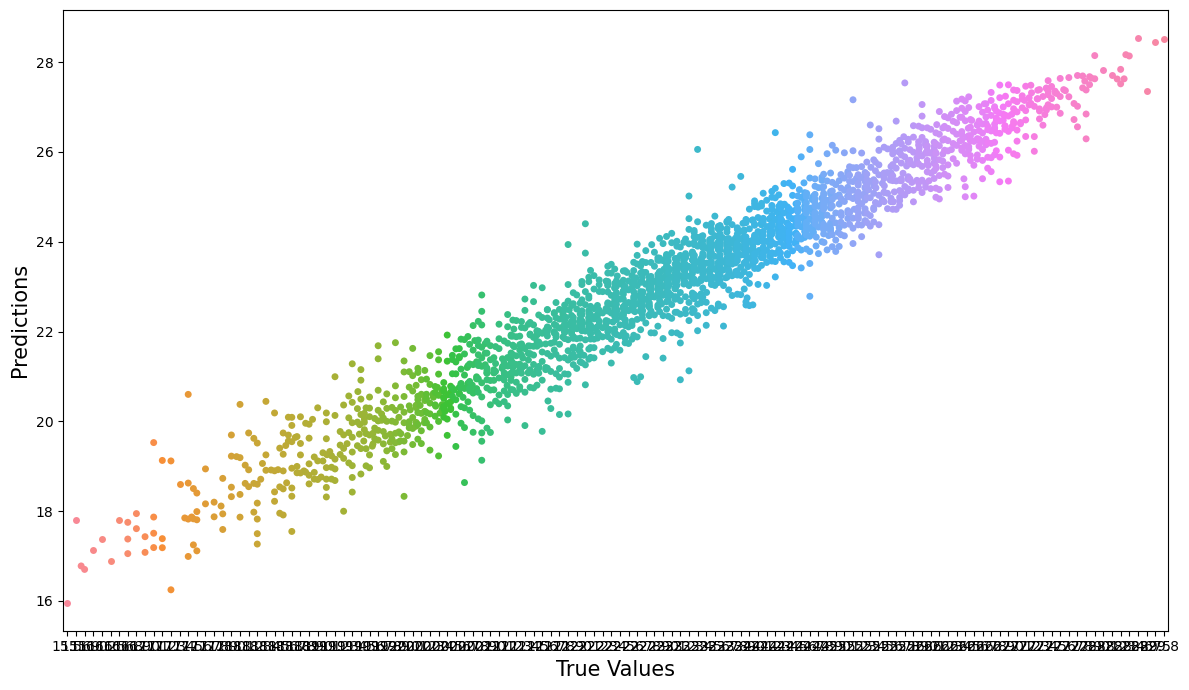

In [83]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()


# Saving Final Regression Model For Next_Tmin

In [84]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

### Prediction According Final Regression Model For Next_Tmin

In [85]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              23.0         24.075644
1              25.6         25.243338
2              23.0         23.075832
3              22.1         23.113935
4              24.0         23.847033
...             ...               ...
2219           24.6         24.059561
2220           17.1         17.188597
2221           23.1         22.687479
2222           26.2         26.180000
2223           25.7         24.809990

[2224 rows x 2 columns]